In [1]:
import pandas as pd
import numpy as np
import re, csv
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

csvfile = "Tweets.csv"
balancedfile = "BalancedUncleanFile.csv"

def createBalancedFile(): 
    csvfile = "Tweets.csv"
#     balancedfile = "BalancedUncleanFile.csv"
    df = pd.read_csv(csvfile)#Pandas DataFrame is 2-D,tabular data structure with labeled rows and columns
#     df.info()

    #counting total no. of records
    totalPositiveRecords = len(df[df["airline_sentiment"] == "positive"])
    totalNegativeRecords = len(df[df["airline_sentiment"] == "negative"])
    totalNeutralRecords = len(df[df["airline_sentiment"] == "neutral"])
    print("Unbalanced Sentiment Values:",df.airline_sentiment.value_counts())
#     print("COLUMN NAMEs:", df.columns)
    print("AIRLINES", df.airline.unique())
    df.airline_sentiment.value_counts().plot(kind='bar')

    #indices
    positiveIndices = df[df['airline_sentiment'] == "positive"].index
    negativeIndices = df[df['airline_sentiment'] == "negative"].index
    neutralIndices = df[df['airline_sentiment'] == "neutral"].index

    #randomaly selecting the records wrt sentiments
    random_Positive_indices = np.random.choice(positiveIndices, totalPositiveRecords, replace=False)
    random_Negative_indices = np.random.choice(negativeIndices, totalNegativeRecords, replace=False)
    random_Neutral_indices = np.random.choice(neutralIndices, totalNeutralRecords, replace=False)
    
    print("RANDOM VALUES: Positive = " ,len(random_Positive_indices),"Negative="  ,len(random_Negative_indices),\
          "Neutal=", len(random_Neutral_indices))
    allIndices = np.concatenate([random_Positive_indices,random_Negative_indices,random_Neutral_indices])
    df = df.iloc[allIndices] 
    df.to_csv(balancedfile) #converting back to csv
    print("A balanced *",balancedfile,"* file created")
    
   
    balancedDf = pd.read_csv(balancedfile)
    print("sentimentValues:",df.airline_sentiment.value_counts())
    balancedDf.airline_sentiment.value_counts().plot(kind='bar')

In [2]:
def dataCleaning():
#     balancedfile = "BalancedUncleanFile.csv"
    stopWordList = set(stopwords.words("english")) 
    stemmer = PorterStemmer()
    punctuations = "-?.!"

    tweetsData = []
    sentiment = []
    dict1 = {}
    

    with open(balancedfile) as csvfile:
        data = csv.reader(csvfile, delimiter=',')
        i=0
        for row in data:
            data = row[11]
            senti = row[2]
            sentiment.append(senti)
            tokenArr = re.split('[(\[\]\+*:.!\,-?;)]', data)
    #         tokenArr =  data.split()
            cleanTextList = []        
            for token in tokenArr:
                if not token in stopWordList:
                    token = stemmer.stem(token) #stemming
                    if token in punctuations:#replacing punctuations
                    #print(token)
                        token = "<PUNCT>"
                    else:
                        #token = re.sub('#[^\s]+',"<HASHTAG>",token)#replacing #hastage 
                        token = re.sub('@[^\s]+',"<USERNAME>",token)#replacing @username from token 
                        token = re.sub(r"http\S+", "<URL>", token)  #replacing url from token     
                        token = re.sub(r"\//\S+", "<URL>", token)  #replacing url from token like this: //t.co/mWpG7grEZP
                    token = token.lower()

                cleanTextList.append(token)

            cleanText = ' '.join(cleanTextList)
            tweetsData.append(cleanText)
    
    array = [tweetsData, sentiment]
    return array
    
    print("EOD")

In [3]:
def writeCleanDataToFile():
    wtr = csv.writer(open ('balanced_clean.csv', 'w'), delimiter=',', lineterminator='\n')
    
    for i in range(1,7068) : 
        wtr.writerow ([sentiment[i], tweetsData[i]])
    
    print("done")

Unbalanced Sentiment Values: negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
AIRLINES ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']
RANDOM VALUES: Positive =  2363 Negative= 9178 Neutal= 3099
A balanced * BalancedUncleanFile.csv * file created
sentimentValues: negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


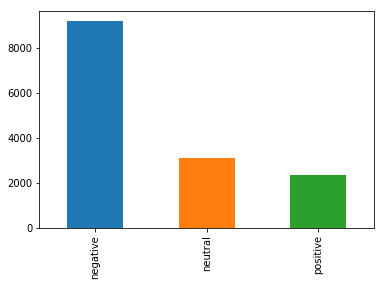

In [4]:

createBalancedFile()
# x = dataCleaning()
# # print(x[1])


In [ ]:
def dataCleaning1():
    balancedfile = "BalancedUncleanFile.csv"
    stopWordList = set(stopwords.words("english")) 
    stemmer = PorterStemmer()
    punctuations = "$%&'()*+,-./:;<=>?[\]^_`{|}~"

    tweetsData = []
    sentiment = []
    dict1 = {}
    
    print("EOD1")
    with open(balancedfile) as csvfile:
        data = csv.reader(csvfile, delimiter=',')
        i=0
        for row in data:
            data = row[11]
            senti = row[2]
            sentiment.append(senti)

#             tokenArr = re.split(r'\W+', data)
            
            tokenArr =  data.split()
            cleanTextList = []        
            for token in tokenArr:
                if not token in stopWordList:
                    token = stemmer.stem(token) #stemming
                    if token in punctuations:#replacing punctuations
                        token = "<PUNCT>"
                    else:
                        print(token)
                        #token = re.sub('#[^\s]+',"<HASHTAG>",token)#replacing #hastage 
                        token = re.sub('@[^\s]+',"<USERNAME>",token)#replacing @username from token 
                        token = re.sub(r"http\S+", "<URL>", token)  #replacing url from token     
                        token = re.sub(r"\//\S+", "<URL>", token)  #replacing url from token like this: //t.co/mWpG7grEZP
                    token = token.lower()

                cleanTextList.append(token)

            cleanText = ' '.join(cleanTextList)
            tweetsData.append(cleanText)
    
    array = [tweetsData, sentiment]
    print(tweetsData[:10])
    print("EOD")
    

    
#     wtr = csv.writer(open (balancedfile , 'w'), delimiter=',', lineterminator='\n')
    
    
    wtr = csv.writer(open ('CleanData.csv', 'w'), delimiter=',', lineterminator='\n')
    
    for i in range(1,7068) : 
        wtr.writerow ([sentiment[i], tweetsData[i]])
    
    print("done")
    
    
    return array

In [ ]:
dataCleaning1()

EOD1
text
@virginamerica
well,
I
didn't…but
now
I
do!
:-d
@americanair
thank
you.
@jetblu
blue
help
bring
color
eyes.
and
I
promis
I
eat
free
snacks.
@unit
thnx
@southwestair
thank
b
day
concert
I
watch
(and
notic
fist
bump/high
five
end
"rock"
version)
@southwestair
@americanair
y'all
better
@unit
@unit
JT
thank
help
i’ll
complet
form
back
home
@jetblu
@jayvig
I
like
inflight
snacks!
i'm
fli
guy
2/28!
#jvmchat
@southwestair
truli
best
#customerservice.
If
someth
goe
wrong,
matter
big
small
issu
was,
fix
it.
thank
@usairway
work
w/
tiffani
H
cust
servic
desk
charlott
help
patient.
still
stuck,
great.
@usairway
you
are
amazing!!!
you
are
the
best!!!
follow
ME
pleas
🙏🙏🙏😢😢😢🙏🙏🙏
@americanair
thank
you.....you
same!!
@virginamerica
good
home
#texa
#moodlight
http://t.co/n3bvzty3zi
@southwestair
thank
get
back
nashville.
big
thank
pilot
6:15
baltimore.
fli
snow
land
ice.
@jetblu
great
experi
flight
sfo
jfk;
seats,
service,
food,
everyth
top
quality.
I
back.
veri
soon!
@southwestair
It
usual
e

au
(austin
bergstrom)
cancun
intl.
best
flight
ever!
the
737'
big...
not
small!
@americanair
I
love
travel
planes,
peopl
nice,
amazing!
can
pleas
follow
back?
😋I
love
company!
@usairway
fabul
thank
much!
look
forward
take
sky
you!
:)
@jetblu
thank
help
quick
respons
@southwestair
great
flight
cabo
last
week
famili
#smoothflight
#frequentfly
@southwestair
kudo
ad
#passbook
app!
I
love
it!
@unit
joni
great
job
flight
5653
lax.
thank
great
flight.
@southwestair
alway
I
fli
sw.
#loyalrrmemb
@southwestair
leav
bur
ten
minut
late
flight
arriv
sjc
minut
suppos
to...
impressed!
#gettingbett
👍
@southwestair
thanks,
guy
best
@jetblu
great
flight
orlando
hartford
week
ago!
wa
great
get
time
arriv
early!
@southwestair
thanks.
I
go
motion
shortli
flight
yesterday.
I
wonder
quickli
flight
attend
notified.
@unit
I
just
ask
MY
boyfriend
TO
prom
over
the
loudspeak
ON
flight
494
HE
said
yes!!!!
best
day
ever!!!
thank
U
SO
much!!!!!!
@unit
ok,
sent
u
info
via
dm.
I
appreci
help
consideration.
😊
@southwes

flight
pilot
got
us
dia
time.
#impress
#outstand
#greatservic
#allgood
@jetblu
awesome!
thank
you!
;)
@southwestair
receiv
awesom
phone
help
jim
today.
help
switch
around
flight
book
points.
@jetblu
even
though
flight
#226
much
need
hot
beverag
4
us
ny-ers,
land
super
smooth
👍👍
😊
#happytweet
@jetblu
tough
choic
I
simultaneously!
As
busi
traveler,
best
experi
long
time.
#wishmyflightwaslong
#what
@americanair
thanks.
have
issu
check
flight,
pleas
check
DM
convo
info.
@unit
new
appl
crâpe,
amazing!
live
ua1207.
realli
nice
crew
too.
#americanair
biscuits,
UA
need
2
http://t.co/gz9gqdt7jj
@usairway
connect
made.
thank
week.
#daddyshom
@unit
thanks,
keep
good
work
@southwestair
@fortunemagazin
well
deserved!
@southwestair
thx.
make
right.
help
meagan
fouti
brancato
fl#2771
dfw
gate
4
preboard
w/kid
b4
group
A
please.
please.
@southwestair
southwest
definit
favorit
airlin
fly!
:D
@virginamerica
hahaha
😂@virginamerica
you
guy
are
amazing.
I
love
you
guys!!!💗
@americanair
thank
AA
upgrad
toda

wi-fi
ua863
@flysfo
@sydneyairport.
amazing!
@southwestair
thx
finger
cross
found.
@americanair
well,
guy
total
kick
million
pound
ass.
bar
none,
best
SM
team
airlin
industri
opinion.
@unit
thank
you!
excit
work
guys!
“@southwestair:
companion
pass.
becaus
everyon
deserv
#redcarpet
treatment
+1
(even
mom).
http://t.co/qjkl4abprg”
@unit
leav
soon.
thanks!
@southwestair
ye
pleas
@unit
thank
leav
3
year
old
row
flight
360
lax-iad
@jetblu
love
travel
jetblue.
cant
wait
go
pari
oui
oui!!!
nyc
awesomeee!
@southwestair
@fortunemagazin
I
DO
like
airlines,
congrats!
@jetblu
I
fli
jet
blue
@virginamerica
i'v
appli
member
#inflight
crew
team...im
100%
interested.
#flightattend
#dreampath
-G
@unit
thank
effort.
I
get
earliest.
though
I
make
complaint
refund
I
lose
one
busi
day
tomorrow
@usairway
provid
best
servic
today!
thank
much
:)
@unit
thanks,
would
awesome.
@unit
I
well
taken
care
of,
thanks.
i'v
alreadi
sent
survey
request
&amp;
i'll
share
posit
experi
(despit
delay)
@jetblu
flight
orlando


appreci
fact
guy
rare
cancel
flight
flight
time,
I
need
cancel
flightlat
time.
🙏
@usairway
thank
you.
We
fill
claim
hope
bag
tomorrow.
@usairway
job
well
done
philli
employe
run
check,in
today.
(tabitha?)
help
us
emerg
&amp;
vacat
saved!!!
@unit
great
flight
pvd.
smallest
plane
I
ever
smoothest
land
ever!
@southwestair
time!
thank
you!
@southwestair
deborah
help
me💁
@jetblu
okay...i'm
actual
tea
kinda
guy
anyway.
thanks!
@jetblu
found
camera!
thank
you!
you
rock!
@virginamerica
So
excit
first
cross
countri
flight
lax
mco
i'v
heard
noth
great
thing
virgin
america.
#29daystogo
@americanair
worries,
love
fli
guys.
thanks!
@virginamerica
guy
perfect
always!
&lt;3
#wervirgin
@jetblu
awe
guy
great
can't
wait
travel
soon!!!
@americanair
great,
thanks!
“@virginamerica:
@karinsle
Of
course.
have
fun
celebrating!”
thanks!
happi
chines
new
year!
@southwestair
@fortunemagazin
love
fli
southwest!
best
flight
attend
ever!
@southwestair
nice
work
update!
@usairway
anoth
great
flight
#funflightattenda

🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😢😢😢😢😢😢😢😢🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏
@americanair
love
flight
back
mia
lhr
great
crew
thank
:-))
@southwestair
DM
sent!
thank
much
responding!
your
respons
timely,
I
miss
it!
@jetblu
thank
do!!
you
guy
awesome!
@jetblu
really!?
that'
good
hear!
thank
updat
@walls29
We
may
make
busi
meet
all.
@southwestair
thank
tip!
@unit
okay
thank
help,
jt!
I
appreci
time!
@unit
ye
!
:D
(y)
from
@therealavi
instagram
:)
@southwestair
thank
:)
@southwestair
great
news
@portcolumbuscmh
today.
finally,
columbus'
top
unserv
market
flights.
@americanair
appreci
update.
have
also
appreci
pilot
effort
explain
us
now.
accurate,
authorit
comm
vital.
"lol
guy
it"
me,
4
month
ago...“@jetblue:
our
fleet'
fleek.
http://t.co/lycarltfhl”
@unit
nawww.
unit
fave
airline.
@southwestair
got
taken
care
of!
thank
&lt;3
@unit
pleas
give
special
thank
aaron
tampa
offic
help
liter
two
hours!
he'
amazing.
mission
accomplished!
@americanair
thanks!
flight
2160
today.
great
crew!
@jetblu
thank
much!!
💙💙
@unit
DM
sent.
than

@virginamerica
thanks!
@jetblu
ooh!
good
one!
speak
#miamor
just
know
#iador
https://t.co/fwzclbvug4
love
#lovesongfriday
@jetblu
haha.
thanks.
you
guy
great.
unlik
@nyjets.
;-)
#gopatriots!
@jetblu
I
excit
I
saw
fli
there!
#ionlyflyblu
@americanair
great
thank
@jetblu
offer
hot
tea
coffee...at
gate!
you
guy
make
wonder
I
ever
flown
airlines!
☕✈👍
@southwestair
gate
attend
mccarran
c16
(vega
dallas)
went
beyond.
after
long
day
frustrat
welcome.
@americanair
got
bag
morning!
thanks!
@southwestair
guy
amaz
send
peopl
meet
imagin
dragon
#destinationdragon
😋
@jetblu
great
flight!
great
view!
:-)
http://t.co/yxn00pnoav
@virginamerica
thanks!
y'all
best
custom
servic
left
industry.
@americanair
great
seat
aircraft!
@jetblu
true.
maybe.
wish
I
expedit
secur
haha
@jetblu
thanks!!
her
80th
bday
saturday.
we'r
aviat
theme
surpris
parti
her.
@usairway
lilli
M
sju
check
fabulous!
@jetblu
that'
great!
thank
you.
@southwestair
@samoore10
thank
kind
response.
the
acknowledg
apolog
go
long
way!
#southw

@unit
got
lost
kindl
mail!
thank
again.
@jetblu
big
shoutout
crew
2017
bos&gt;jfk
&amp;
486
jfk&gt;roc,
&amp;
gate
crew
c19
bo
&amp;
6
jfk.
long
day
delay
made
better
them!
@southwestair
thx
quick
respons
action!
bf
make
good
use
voucher
#satisfi
#happycustom
@usairway
thanks.
If
anoth
method
also
would
nice.
appear
design
flaw
@usairway
new
f/a
dfw
clt
morn
great
job.
well
done!
@unit
thx,
dm'd.
conf
#'
mqxc64
&amp;
mpwnc2.
ani
help
appreci
@southwestair
first
time
fli
you.
you'v
definit
over!
@americanair
aww
thank
aa..dfw
gma
am..so
understand
..btw
a.a
airlin
im
abl
trv..love
guys.:)
@virginamerica
thank
easi
itinerari
shift
impend
weather.
quick,
painless
&amp;
free.
@jetblu
I
would
go
anywher
jetblu
goes.
@southwestair
glad
final
resolv
too.
too
bad
I
can't
get
free
voucher
go
mine
I
friend
travel
next
time!
@jetblu
thank
#loyalmosaicmemb
@americanair
thank
much!
@americanair
joann
san
diego
staff
phenomenal!
give
girl
raise.
she
handl
#flightnightmar
better
anyone.
@virginameric

@southwestair
thank
excel
respons
time
assistance!
all
set
:)
@unit
@jms2802
outsourc
unit
airlines...your
custom
love
it.
outsource.
outsource.
outsource.
@jetblu
awesom
thanks!
thank
quick
response.
you
guy
rock!
:)
@unit
sorry.
I
end
US
air
flight.
thank
though
get
back
me:)
@americanair
such
suprise!
new
vaniti
kit
set
frequent
travel
😀
thank
aa!
http://t.co/fa7nygn1ux
@unit
got
gate,
thank
checking!
@southwestair
I
love
companion
pass
(qualifi
4th
year).
#hollymai
@unit
look
like
i'm
settl
i'm
going.
thx.
@southwestair
anoth
great
flight
&amp;
crew,
la
vegas-chicago
#3397.
thanks!
@jetblu
reimburs
everyon
flight
portion
ticket.
I
still
love
jetblue!
best
american
airline!
@usairway
thank
@jetblu
great
flight
crew!
flight
51
bo
mco
@southwestair
guess
ashley
is.
she'
great
job
presenting.
#ragandisney
http://t.co/5znmwxdi9u
@americanair
congrat
call
center
custom
service!
A
guy
name
fidencio
answer
went
&amp;
beyond
help
me!
👌👌👌
I
know
lot
baggage...
but
want
know
realli
enjoy
insi

#books!
http://t.co/9ragncw2bk
@usairway
also
appreci
hashtag!
:)
#lucycat
@southwestair
love,
love,
love
this.
southwest
rocks!!
always!!
https://t.co/q8vsffrd1u
@unit
gate
agent
alavera
amaz
@virginamerica
congrat
VX
new
route!
✈️🎉
@unit
2/20
denver
ap,
gate
b91
(destin
santa
fe),
agent
ashley
amaz
job
face
angri
traveler.
kudos.
@virginamerica
thank
much!
@unit
441,
also
1
work
WC
coach.
good
thing
bird
land
ahead
schedule.
I
use
WC
stat.
@usairway
thank
final
got
bag.
custom
servic
rep
wonderful.
@unit
thank
make
sure
hear
message!
@unit
club
denver
dope
👌
@usairway
thanks!
http://t.co/pd7r1ll6r
@jetblu
annnndddd,
I
book
flight.
that
easy.
@southwestair
we'r
pull
runway
now!
make
new
friend
seat
mates.
thank
respons
cb.
@southwestair
your
terri
hero!
got
husband
back
thru
secur
retriev
cellphon
left
plane
austin.
terri
#85832
U
rock!
@usairway
pleas
keep
emili
gso
airport
ticket
staff
amaz
@unit
would
love
help
get
today.
In
#ewr
now.
will
take
airlin
connections.
thx
@unit
1632
ph

flight
I
hope
I
get
tonight
😭
@southwestair
I
miss
mine
terribly.
A
+1
30th
anniversari
would
amazing.
It
would
mean
luv
air.
#dontmakemebeg
@jetblu
phone
agent,
pl
do!
peggi
pleasant,
inform
delivered.
⭐️⭐️⭐️⭐️⭐️
@southwestair
hey
yea
I
got
thru...everyth
good
(well,
7-10
day
voucher
goe
through)
appreci
it!
@virginamerica
got
1pm
newark
home
la.
your
folk
ewr
incred
#letsgohom
@americanair
I
love
much
planes,
pleas
follow
back?
it'
amaz
bussines!
@americanair
nicest
peopl
ever
flight
chicago.thank
david
dean
&amp;
norma
sedholm
make
feel
comfort
✈️✈️✈️✈️✈️✈️✈️
@jetblu
great
thank
you,
let
hope
so!
could
pleas
notifi
flight
2302
leav
jfk?
thank
@usairway
you
are
the
best!!!
follow
ME
please;)🙏🙏🙏✌️✌️✌️🙏🙏🙏
@unit
can't
wait!!!
787!!!
@tpallini
http://t.co/odlall5edh
@americanair
flight
time
late
flightli
though!
@jetblu
Oh
total
look
par
@americanair'
admir
club;
way
slide
us
coupl
passes?
;)
@usairway
ok.
thank
@americanair
cxl
flight.
rebook
2
pax
problems.
thank
everyon
AA
help
us
out

horrible!!
@jetblu
thank
thank
you!
I
final
set
jetblu
app!
yay!
@southwestair
thank
you!
❤️❤️❤️
guys!
@usairway
your
clt
baggag
crew
deserv
#kudos.
I
run
make
connection.
and
bag
still
made
it!
#customerservic
@southwestair
black
histori
commerci
realli
sweet.
well
done.
@unit
awesom
new
plane
flight
1701
@southwestair.
50th
anniversari
april
10th.
still.
sweethearts.
companions.
lifetime.
sons.
families.
love.
@unit
thank
you!
I
wish
ladi
littl
rock
told
morn
I
ask
@americanair
thank
:-)
good
back
safely.
see
soon!
@jetblu
flight
jfk-sfo
pure
awesomeness.
mint
class
tim
attend
best!
other
airlines,
take
notes!
@unit
thank
you.
there
one
month
ago,
none
now.
weird
club
one
busiest
airport
us.
@southwestair
beyond
readi
@jetblu
well
lucki
I
fli
jb..i
guess
I
would
even
squish
airlin
😞
@usairway
drink
voucher
next
flight??
#winkwink
@unit
So
excit
I
put
earlier
flight
get
home!
woo
hoo!
#travel
🎉🎉🎉
@jetblu
incidentally,
sheila
jfk
deserv
rais
awesome.
@unit
"airport
snow
remov
method
#2

board..
but,
on!
@southwestair
happi
final
put
#southwestairlin
board
pass
passbook!
make
life
much
easier
✈️
@americanair
thank
gang!
mind
I
ask,
handl
social
media
house?
@jetblu
miracul
fix
plane
#kudo
shoe
ever
@jetblu
I
see
that!
work
pick
trip
two
type.
@jetblu
safeti
first
!!
#lovejetblu
@americanair
good!
i'm
catch
11:10p
flight
tonight.
thank
response.
@southwestair
thank
response.
wa
abl
get
situat
resolved.
not
fan
mother
natur
today.
:)
@unit
thank
reply.
I
fill
form
submit
requested.
good
know
pay
attention!
@southwestair
thank
help
out!
class
act,
way...
see
air!
@unit
thanks.
It
ticket.
@jetblu
yes!
alway
treat
fli
guys!
😊✈️
@americanair
I
think
help
base
behavior.
the
voucher
cot
seem
like
enough
lol
😃
@jetblu
i'm
set.
about
fly.
not
bad
first
date
giant
metal
bird
machine.
she
even
brought
snacks.
@jetblu
oh
yes!
I
hope
expand
airport
soon
I
fli
see
famili
year!!!!
@southwestair
best
airlin
one
better
#onelov
#southwest
#bestairlin
@southwestair
"airport
snow
remov
met

90
music
blast
gate
#boston
wait
flight
#sanfrancisco.
onli
I
could
get
ice
coffee!
@unit
upgrad
first
class
nice
way
fix
earlier
mistake.
thank
you!
@usairway
4
flight
48hr
&amp;
i'v
flight
attend
3
flights.
freaki
coincidence!
plu
side
great.
:)
@unit
got
it,
thanks.
@southwestair
thank
you!!!
#bringbacktheluvtordu
#miami
#directflight
@usairway
I
total
understand
weather.
just
frustrated.
thanks!
@unit
would
help!
integr
app
I
"activate"
surf...
@southwestair
thank
follow
up.
I
appreci
it.
@unit
great.
look
forward
respons
DM
@usairway
@americanair
thank
coupl
easy,
hassl
free
flight
today,
profession
friendli
staff
made
everyth
easy!
@unit
thank
you
@unit
got
home
amid
snow
&amp;
cancel
flightlations;
deliv
bag
w/o
hassle;
plu
wait
phone
&amp;
upgrade.
thank
you!
@unit
brian
sfo
custom
servic
deserv
raise,
gave
extra
meal
voucher
good
joke
cheer
flight
delay.
#ftw
@southwestair
know
what'd
beyond
awesome?
A
pair
ticket
@imaginedragon
show
atl.
A
girl
dream
#destinationdragon
@jetbl

problem
would
made
reach
time
meeting.
also
wanna
take
chance,
book
@etihad
instead
@usairway
honestli
quickli
possibl
i'v
hold
sine
9:50pm?
everyon
answer
send
someon
else.
@jetblu
appli
new
tag,
left
bag
ground
rather
load
convey
belt..i
walk
back
50
yard
@unit
If
busi
decis
made
inconveni
possibl
caus
lost
customers,
good
busi
decision?
#cranki
@jetblu
ridicul
1.5
hour
come
wait
deplane,
newborn
board
@unit
I
honestli
tell
you.
all
I
know
origin
go
brought
concours
@jetblu
get
home!
flight
2016
buf
bo
miss
captain!?
really!?
@southwestair
cancel
flightl
flight
without
explan
pick
phone...25
minut
counting.
#customerservic
@olive201
@usairway
I
noth
issu
I
fli
w/u
what'
w/that?!
#travel
#vacat
#aw
@united,
I
believ
do..
http://t.co/7z3gqebfk2
@jetblu
pr-friendli
tweet
help
drive
accountability.
hope
mr.
hay
take
note.
@unit
realiz
bag/
content
wet
I
got
hotel.
sent
suit/shirt
dri
cleaned.
mtg
start
tomorrow.
@americanair
TY
can
confirm
deni
aa953
left
jfk?
I
want
figur
delay
store.
i

rub
wrong
way.
I
wasn’t
late
flight.
@usairway
502
m-phx
Im
still
the
plane
wait
and
wait
@unit
nope
I
gave
mayb
they'll
deliv
@americanair
cabin
'thank
you'
messag
remind
peopl
choic
fly.
I
choos
anoth
airlin
next
time.
@usairway
@americanair
3
hour
hold
got
rebook
new
flight
yesterday.
I
ask
new
itinerary/confirm
email
sent
@usairway
your
system
affect
weather?
@jetblu
flight
attend
suck
alway
rude
:(
4th
bad
experi
jetblu
tonight
:/
@americanair
I
like
make
scene
address
properly.
pleas
that.
@unit
we'v
wait
45
min
gate
sfo...
yet
mani
free.
your
excel
oper
effici
show
@unit
now
submit
third
time,
pleas
check
confirm
receipt.
have
taken
screen
shot
case
disappear
again.
thank
@unit
flight
5559
yyc
provid
free
food
allow
back
board
"broken
lightbulb"
@unit
websit
complet
joke
use
safari!
@usairway
disappointed.
least
could
give
us
access
admir
club
hour
flight
wedding!
@usairway
I
ask
reimburs
mayb
mile
ad
account
inconveni
money
I
spend
@southwestair
I
spoke
soon...
My
bag
lost..
:(

9hour
flight
delay
4
hours,
wors
ever
forgot
meal.
@unit
sandra
ur
intern
checkin
counter
rude
offensive.
she
comment
care
I
complain
cuz
25yr
@southwestair
use
exclus
fli
sw,
late
flightly,
direct
flight
&amp;
cheaper
cost
switched.
😔
why...so...
few...direct...flights?
@jetblu
one
four
flight
trip
time.
what
he'll
compani
problem?
@americanair
suck
worst
airlin
ever
I
never
fli
I
stuck
13
hour
one
help
#fuckoff
@usairway
way
get
call
center
answer
oneworld
award?
whenev
tri
system
say
busi
disconnect
endless
hold
@usairway
I
open
credit
card
earn
44,000+
miles,
wont'
credit
mile
account
restor
forfeit
mile
@unit
roc
flight
cancel
flightled.
love
snowi
drive
home
use
substitut
@unit
@flysaa
lost
baggage…
heard
differ
thing
differ
employe
@united.
@flysaa
said
nothing.
@usairway
plane
ground
longer
air.
us5235
@americanair
i'm
get
call
1-800-433-7300
call
seem
drop
instantly.
Is
altern
avenu
resched.
support?
@unit
u
lost
bag
would
refund
bag
fee?
doe
make
sens
you?
and
ye
I
alreadi
ca

would
happen.
@southwestair
50min
get
bag
check
n
atx,
miss
flight,
spend
day
@bwi,
n
get
baggag
end
all.
#epitimeoffail
@jetblu
I
can't
make
chang
websit
I
still
charg
25
dollar
use
phone
@unit
united'
servic
level
reach
etihad
let
realist
lufthansa
ill
consid
.@southwestair
yes,
total
4
hour
hold.
with
cancel
flightlations,
one
would
think
would
staff.
decid
cx
drive
@americanair
far
I
get
"mayb
bag
come
today.
We
know."
websit
say
"statu
unknown"-
help?
@unit
flight
cancel
flightl
bdl
strand
@dulles_airport.
wait
almost
2hr
custom
service.
shout
dilig
agents.
@usairway
3
hr
hold.
husband
decid
sleep
shift
miss
phone
rep.
reschedul
@unit
nope
here.
you
need
littl
red
stamp
counter.
check
yourself,
wreck
son
http://t.co/0prgysvurm
@usairway
tell
I
correct
tag
luggage!!!
My
luggag
appar
LA
charlotte.
thi
ok!!
@americanair
My
flt
aa375
02/23
got
cncled
cant
get
hold
csr
get
altern
arrangement.
plz
help
@usairway
fail
day
long,
I
blame
@americanair
@usairway
I
got
2
5
flight
bo
charlott


$200.
loyal
flier
10
year
time
change.
@unit
U
kept
passeng
wait
night
4
plane
put
service.
leav
everyon
strand
night.
#inexcus
@southwestair
extra
luggage,
cost
$75????
@americanair
incred
arrog
thing
say
I
sit
o'har
wait
incompet
airlin
refuel
a...
@unit
i'm
rebooked.
get
home
4
hour
late
flightr
planned.
what
chanc
i'll
ever
see
bag
again?
#unhappytravel
@americanair
tell
luggag
stay
insid
plane
!
look
video
http://t.co/yokkhhqcmp
@unit
i'm
person,
i'v
sit
denver
three
hour
I
want
get
plane.
pleas
let
go
home.
@unit
told
chang
flight
im
ottawa
airport
AC
cant
find
reservation!
what
wrong
@americanair
custom
servic
(if
call
that)
refund
money
@usairway
My
bag
suppos
deliv
nyc
last
night
(miss
sinc
thurs)
here.
can
someon
call
me?
@usairway
custom
servic
philli
deplorable,
rude
&amp;
unprofession
gate
agent
delay
&amp;
cancel
flightat
#takingthistothetop
@southwestair
stand
la
vega
flight
say
time,
rep
tell
us
flight
denver
cancel
flightled.
help
@americanair
alreadi
know
isn't
everyo

@southwestair
hey
swair-
tortur
board
flight
1971
due
one
gate
agent
board
assist
folk
one
time.
@virginamerica
your
back
seat
entertain
system
accept
credit
card
apostroph
surname.
#apostrophefail
@usairway
got
worst
servic
i'v
ever
seen
airline.
3
cancel
flightl
flights.
rude
employees.
current
flight
delay
@unit
airlin
pay
extra
get
better
seat
time
board
overbook
flight,
there'
overhead
space.
@usairway
chose
flight
time
sensit
arriv
and
drop
ball.
what
gives?
clt
#667
good
way
lose
busi
@usairway
work
bought
rental
car
fail
get
locat
paid
get
now....
@americanair
I
hold
3
hours.
2
second
rude
agent.
@southwestair
gate
agent
gave
wrong
departur
info
caus
miss
flight
I
stand
by!
#nothappi
@united,
wtf
usernam
and/or
email
addr
signin
still
unavailable?
been
tri
login
sinc
sunday
@usairway
ten
hr
late
flightr
still
armi
cot
@
airport
wait
11am
flight.
#poorlyhandl
#usairhead
http://t.co/18fmr06mn6
@americanair
@cinedron
I
wish
team
member
would
pick
phone
point,
let
alon
courteou
hel

email.
I
(cont)
http://t.co/utfdhxa8pu
@unit
2
hour
flight
turn
3:30
ordeal...sigh
@unit
#worst2unitedflightsev
UA
236
la
iad
2/24
mechan
problem
took
land
fix
delay
#wtfodds!
@southwestair
estim
hold
onlin
end?
i'm
hour
forti
minut
now.
I
need
rebook!!!
@southwestair
sure
was,
@delta
look
like
i'll
make
birthday
celebr
all.
@americanair
It
go
report
polic
due
sexual
assult
sad
care
@unit
still
wait
repli
@usairway
black
hole
phone
system
@usairway
gold
desk
quot
$900
rebook
due
weather.
can
buy
first
seat
flight
$440.
why?
On
hold
45+
min
@americanair
okay...
If
someon
look
fear
lost
forever.
it'
small
item.
@usairway
it'
pretti
hilari
want
@sweetingr
finish
aw
experi
something.
make
right,
now.
@americanair
advantag
agent
horrible!
i'v
wait
5
hour
call
back
hung
rude
agent!
@americanair
no.
I
told
I
got
put
anoth
flight
I
would
get
email.
still
gotten
one
yet.
@unit
airlin
cancel
flight
OC
fll
#flight
today.
$700
switch.
No
notic
apology.
done
fli
#unitedairlines.
@usairway
yes,
I
re

first
place
I
realli
need
extra
stress
alreadi
terribl
time.
Oh
way,
I
made
flight
30
@unit
well,
consid
everi
agent
claim
unabl
help
everyth
else,
wast
time
hear
'call
corp'
@usairway
I
eventu
given
flight
memphi
I
taken
origin
flight
bc
I
check
father
really?
9+hours????
@united:
@jenniferwalshpr
We
like
delay
avoid
them.
we'll
way
asap
@unit
line
respons
here.
and
i'm
wait
tomorrow
morn
flight
overbooked.
@usairway
@seanvros
sean
keep
mind
call...plan
hold
3+
hour
@americanair
24/7
phone
line
open?
On
hold
2
hour
now.
your
check-in
agent
cannot
help
airport
itself.
pleas
help.
@unit
I
sent
email
custom
care,
tell
I
may
break
😢.
I
sincer
hope
help
me!!
@unit
50
minut
wait
time
help
cancel
flightl
flight??
help
guy
out?
@unit
horrif
flight
experience,
guy
made
never
want
fli
airplan
everi
again!!!!!!!
@usairway
i'm
assist
@marccopely.
He
alreadi
rebooked.
agent
rude,
unhelpful,
discourteous.
#frequentfly
appalled.
unacceptable!!
@americanair
next
time
flight'
cancel
flightled,
i'd
app

yeah
sale
fares!
I
got
place
fly!
Oh
damn,
right,
I
live
swa
fly.
#whi
“@jetblue:
our
fleet'
fleek.
http://t.co/lv9hwqdk9a”
can't
fli
anymore,
good
run
✌️
@unit
flight
1114.
unfortun
isol
flightd
incident.
I
wait
less
20min
year
@unit
item
sentiment
valu
i'm
heartbroken
miss
@usairway
not
happi
start
trip!
cancel
flightl
flight
#poor
customerservic
@jetblu
poor
storm
custom
service,
1hr
takeoff
delay
wait
snack
cart,
rude
steward
(no
names)
I
love
guys.
#trueblu
@southwestair
fyi
link
baggag
incid
email
redirect
404
mobile.
the
link
auto
chang
mobile.
desktop
work
fine.
@americanair
I
rebooked.
I
call
left
number
callback
heard
anyth
flight
tomorrow.
:(
@virginamerica
I
need
regist
servic
dog
first
class
ticket
sfo
&gt;
dulles.
the
phone
queue
hour
longer.
pl
advis
@unit
flt
4567
gate
agent,
announcements.
So
unprofessional.
time
go
back
@delta
@jetblu
still
sit
plane
newburg.
thi
get
#ridiculous.
No
way
treat
#loyal
customers.
@jetblue,
would
nice
app
would
actual
inform
flight
delaye

time
speak
someone?
I
never
fli
airlin
again.
@usairway
long
repli
@americanair
you
could
get
us
flight
30
minut
funer
starts.
we'r
strand
dalla
w/o
luggag
2
day
@unit
thanks!
make
sense.
just
annoy
can't
determin
better.
.@southwestair
3
day
&amp;
still
home.
not
even
ground.
3.
days.
#pastmypatienceexpirationd
@unit
hey,
left
comput
bag,
w/comput
inside,
united,
file
onlin
report,
respons
@virginamerica
tri
make
chang
advanc
(not
24
hour
prior)…tri
onlin
earlier
want
$300
chang
fees.
@virginamerica
I
seat
4C
I
cannot
even
open
laptop;
I
paid
extra
seat!!
@unit
$7
wifi
I
tell
famili
i'm
gonna
late
flight
caus
sit
ground
plane
past
two
hours...
@unit
thank
lack
help
can
respons
1K
desk!
@americanair
70
day
contact
human
apolog
letter.
@americanair
#yucki.
read
soon
http://t.co/9r9omzqavi
@jetblu
unhappi
4
hour
delay
flight..
miss
dinner
@usairway
useless
tweet
i'v
ever
seen
you.
@usairway
trick
get
hold
queue?
i'v
call
sinc
thursday
keep
get
"call
back
late
flightr"
messag
@americanair

dca
cancel
flightl
evening?
@usairway
strand
bwi
two
diversions.
No
cust
service,
transport.
dump
here.
terribl
custom
service!
@southwestair
realli
guidanc
call
via
phone
back
logged.
I
could
done
onlin
3
minutes.
@usairway
i'v
hold
2
hours.
need
re-book
flight,
pleas
help.
@usairway
flight
I
connect
1857.
@unit
I
miss
it.
set
hotel.
flight
delay
sfo
6+
hours.
miss
wed
festiv
friend.
😞
@unit
which
speak
basic
worst
design
web
system
ever.
@americanair
cancel
flight
#1605
6/25
&amp;
6/28?
flight
4
hr
longer
&amp;
layovers.
too
late
flight
find
reason
price
alternative.
@americanair
you
cancel
flight
flight
there’
way
rebook
websit
app?
I
wait
35
minut
hold?
#fail
cc
@delta
@unit
could
pleas
send
phone
#
refund
department?
We
submit
claim
email
without
success.
@southwestair
I
book
flight
phone
never
got
confirm
email.
how
would
I
go
get
that?
@jetblu
free
wifi
make
televis
working...
it'
statici
#ithelpsabit
@usairway
houston
hub
Aa
T.
employe
bag
here,
It
made
Pa
me!
oop
problem
http:

@americanair
said
AA
provid
in-flight
wifi
rout
china
base
feder
laws,
unit
does,
that?
@unit
I
can't
tell/purchas
websit
put
us
lufthansa
flight
first
leg.
@unit
get
delay
flight
ewr
yyz
15:30?
No
custom
servic
found
airport
@usairway
I
cant
get
anyon
phone
help
award
travel.purchas
extra
mile
10
minut
late
flightr
mile
need
raised.
@americanair
what
that!?
whi
even
bother
cater
dog
food
one
eat
http://t.co/ifespcbztm
@jetblu
u
suck!w
sit
9hr
ur
neglig
@americanair
@unit
contact
me,
someth
allevi
terrible,
terribl
service.
but
no,
22
year
old
social
media
guru
@usairway
guy
I
need
help
reservations,
tri
call
i'm
told
call
late
flightr.
pleas
help
here.
@americanair
I
talk
actual
person
help
me,
guy
do?
@unit
4-6hr
yet?
@americanair
I
can't
get
custom
rep
help
out.
thi
option
I
got.
@americanair
final
take
off!
thank
custom
servic
g8
rep
@
c17
@
ctl.
ani
idea
caus
system
failure?
@unit
@simonroesn
need
upgrad
seat
too,
even
economi
plu
like
sit
concret
bench.
@americanair
how
clueless


I
abl
check
flight
morning.
@usairway
My
flight
book
problem
c68ld9
time
I
select
manag
My
flight
book
problem
month
now.
I
email
response.
help?
@southwestair
sort
of,
i'm
arriv
day
late
flight
incur
overnight
cost
connect
city.
not
cool
all...
@unit
big
surpris
#nogat
wait
plane.
same
fucken
issu
everyth
I
fli
you.
#fail
#worstairlineev
@americanair
email
aadvantag
statu
match
...
still
waiting.
can't
wait
move
@unit
help
:)
@southwestair
complet
understand
act
god
weather-rel
flightd
cancel
flightlation,
4
day
without
reimburs
kind
#unaccept
@southwestair
come
i'm
get
point
I
buy
rapid
reward
shop
site?
@southwestair
ye
attitud
nasti
comment
@southwestair
wait,
wait
get
straight.
I
fli
person
business.
but
now,
sure.
#bebett
@usairway
medic
issu
late
flight
yesterday
need
chang
flight
today
hold
hour
still
@unit
instal
work
same.
kick
hour
let
back
in.
four
wast
hours.
@unit
whi
I
still
bags?
they
arriv
@10am
&amp;websit
say
they'r
still
airport..2
1/2
hour
late
flightr???!!
#nothap

2hr
delay
I
way
out.
never
fli
again.
@unit
i'm
first
time
solo
femal
travel
pretti
scari
foreign
place
know
belong
are...
@usairway
congrats,
lost
custom
good.
when
I
made
unit
weather
change,
free/5
min.
you
guy
2
hr
hold
&amp;
$25.
@jetblu
whi
deal
plane'
ground
instead
divert
plane
&amp;
ad
2
hr
flight?
@usairway
yes.
everi
one
everi
flight
like
this.
there
need
velcro
someth
@southwestair
thx
respond
@jetblu
whi
"best
fare
finder"
work?
@americanair
stress
morn
still
pay
check
bag.
lax
madhous
lot
angri
customers.
yike
“@united:
@qlyss8
We
want
custom
frustrated.
thank
patience.
^jt”
A
love
sentiment,
$180
one.
@jetblu
that'
I
heard.
weather
fine
morning.
flight
136
circl
time.someon
forgot
clean
runway.
@unit
2
day
1
flight
cancel
flightled,
anoth
delay
8
hours-
unit
gave
$7
food
voucher.
that'
much
valu
time??
@unit
friend
sit
houston
sinc
7am
flight
cancel
flighted.stil
answers.
#badcustomerservic
#$10voucherwhatajok
“@united:
@mllovelac
the
baggag
fee
waiv
premier
members.
ple

love
them!
#dobett
http://t.co/ua6doua34l
@americanair
strand
miami
autom
system
keep
hang
two
days.
help
!
@jetblu
flight
1106
delay
ny?
same
problem?
@americanair
advis
turn
issu
polic
due
sexual
assult
thank
you
for
allow
that
ON
your
plane!
@americanair
standbi
line
updat
onlin
app
either
troubl
@unit
I
chang
airport
actual
get
flight
flight
fay
cancel
flightl
twice.
$180
taxi
ride
rdu--reimburse?
@usairway
pleas
updat
websit
current
flight
status?
and
updat
custom
servic
phone
#
@googl
thx
@usairway
I
keep
get
hung
on.
pleas
respond
I
book
ticket
you.
I
abl
buy
one
unless
I
speak
someone!
@southwestair
rebook
atlanta
&amp;
drive
#nashville.
had
pay
ridicul
price
difference.
bad
weather
good
busi
@usairway
yes.
It
say
bag
delivered.
the
local
number
say
not
open.
ask
main
#
cust
servic
got
hung
on.
@usairway
flight
4500
and
403
delay
"crew
availability?"
what
gives?
i'm
get
tpa
2.5
hr
past
schedul
arrival.
@unit
A
day
late
flightr,
one
delay
&amp;
one
cancel
flightl
flight,
i'm
gat

hour
half
knew
gate
@usairway
hire
smarter
IT
peopl
system
keep
crash
instead
mook
man
airport
with.
#godelta
@usairway
call
find
I
re-book
tomorrow,
ask
number
email
day
info
@jetblu
lack
TV
made
rough,
that'
liter
I
pick
y'all
competitors.
@americanair
i'm
tri
make
reserv
&lt;
2
year
old
lap
child.
don't
see
option
online.
how
I
proceed
reservation?
@southwestair
relay
concern
realli
mean
&amp;
how/whi
u
keep
let
peopl
flight
bag
larger
u
state
allowabl?
@americanair
ani
reason
1463
flight
chicago
board
I
still
seat
assignment?
seriously?
@usairway
I
sure
sincer
apology,
disappoint
custom
perspect
want
loyal
custom
#option
@unit
sunday
husband
travel
chicago
he'
stuck
tarmac
&amp;
miss
connect
flight
alway
@jetblu
absolut
worries.
i'm
never
fli
again.
ever.
even
I
hitch
hike
cross
countri
#passengersarepeopl
@americanair
@maxfitgirl29
next
time
fli
southwest...
@unit
tri
call
too,
w/25
min
phn
wait
mean
we'd
miss
option
anyway
@southwestair
sucks.
passeng
leav
plane
make
room
luggage

leav
earli
@americanair
i'v
tri
4
hour
get
hold
someone.
@unit
obvious
staff
ewr
unit
otherwis
seen
ad
friendli
help
#ewr
worst
airport
@jetblu
w/
$70
upgrade.
unsur
can't
switch
someon
around.
I
call
24
hr
advanc
reason.
@usairway
i'v
tri
days!
and
I
get
hung
I
get
prompts.
what
I
do??
@jetblu
are
issu
onlin
check-in?
My
colleagu
I
get
"webpag
available"
submit
onlin
form
@usairway
luggag
delayed.
i'm
look
compensation,
since,
know,
charg
forgot
it...
@americanair
one
checkpoint
open
jfk
termin
8?
ridiculous.
@americanair
So
visit
sju
return
pari
check
bag
gate
sju,
arriv
pari
nothing,(1)
@unit
i'm
extrem
disappoint
w
servic
trip
#unit
#mileageplu
explor
card
holder.
@americanair
flight
1181
vega
dfw.
cancel
flightl
sunday
monday,
whammi
today!
@southwestair
seriously,
reason
cancel
flightl
flight
long
phone
wait
time
guy
tremend
understaffed?
@jetblu
tri
us
towed.
Do
think
i'll
fli
termin
again?
risk
$75
fine
corrupt
polic
offici
@unit
nightmare!!
both
side
flight
disaster!
At
housto

mem
:(
@americanair
flight
386
dalla
jacksonvil
fl
cancel
flightled.
No
one
notifi
me.
what'
go
on?
@jetblu
delay
perfect
time
learn
swift
program
@teamtreehous
@unit
"the
extra
care
airline".
#unitedairlin
care.
trust
me.
there
#customerservic
non
existent.
they
1
@americanair
bought
ticket
@southwestair.
after
two
days,
"team"
share
data
need
get
next
meeting.
@jetblu
i'v
heard
new
flight
tap
pay
reader
accept
onli
appl
pay.
I
thought
imposs
&amp;
certainli
emv
compliant
@usairway
I
fam
that
suppos
fli
2/22
current
hosp.3
tri
speak
human,
yr
phone
sy
cut
off.
pl
hlp!
@americanair
i'm
sure
happen
usairway
statu
merger
took
place.
@usairway
appreci
auto
reschedul
cancel
flightl
flight--
noth
sooner
tuesday?
fli
altern
loc?
@usairway
it'
doubl
booked.
I
spoke
CS
we'v
got
plan
fix
this.
it'
still
amateur
mistak
never
happen.
@usairway
ivr
hung
high
call
volume?
I
need
help.
call
@unit
tri
differ
flight
iah-mnl
4/1/15-4/17/15,
6
flight
advertis
$1038
bookabl
(due
partner
error).
@virginam

stop.
@deltaassist
57
minut
wait
silver
elit
line
someon
pick
up!
help!
@usairway
still
yuma
wait
2702
go.
look
like
I
might
miss
2696
montereyregionalairport
need
option
pleas
@usairway
still
hold...1
hr
27
mins....thank
god
chairman
status.
statu
match
@delta?
@unit
flight
4841...3
gate
chang
top
this.
realli
hope
compens
points/mileag
account!
@southwestair
pretti
stupid
I
probabl
fli
again.
plu
hear
nightmar
stori
overbook
flights.
@unit
will
never
fli
again!
terribl
service!!
ruin
entir
vacation!!
#lostsuitcas
#noreimburs
@southwestair
friend
boston
stuck
denver.
her
name
jane.
@rncahil
pleas
contact
her.
@americanair
also
one
singl
person
counter
answer
question
plane
full
confus
people.
No
staff
all.
@usairway
I
call
I
left,
turn
@unit
answer
phone
instead
rebook
usair
flight.
@unit
My
guess:flight
go
cancel
flightl
16
empti
seat
confirm
important.
#frustrat
@usairway
fine.
just
wonder
money
went...
@americanair
It
say
web
site
u
fli
directli
ord
dub.
I
tri
book
say
not.
have
st

number
0016
964012,
0016
964077,
0016
964078
let'
find
bags.
@americanair
load
luggag
plane
over
hour
delayed?
#flight293
@unit
I
appal
lack
commun
aw
journey
2/21
ewr
bos.
4
hr
delay
need
explain
better.
@usairway
answer
the
bloodi
phone!
@unit
whi
releas
travel
advisori
iad
tomorrow????!!!!!!!!
@americanair
delay
bag
friend
lisa
pafe.
she
got
bag
3
day
costa
rica.
issu
updat
system.
@unit
what'
go
mileag
plu
accounts?
login
usernam
email
least
three
days.
@jetblu
come
on!
alreadi
delay
2+
hr
flight
1415
wait
pilot
come
boston,
reassign
him?!
endless
trip.
@americanair
not
true!!
stop
make
excuses!
you
either
overbook
crappi
planes!
@southwestair
hold
long
rebook
cancel
flightl
flight
I
enough
time
rebook
@usairway
instead!
lot
room
there!
@usairway
delay
2
day
weather
top
I
got
yell
late
flight
I
notifi
time
chang
#welldon
@usairway
upset
custom
service.
I
simpl
question
phone
system
disconnect
day
today
yesterday.
@united,
link
current
statu
flights/airports?
fli
bwi-ewr-mco
morn
ye

year
armrest
TV
control
work
agian!!and
that'
main
reason
I
fli
jetblu
😔😓😤
@usairway
ruin
honeymoon
caus
us
miss
intern
flight,
stranded.
@unit
Ph
pat
answer
bs.
after
I
deni
board
sat
gate
9:05!
your
employe
total
suck.
@jetblu
delay
1:02!
thi
ridicul
@americanair
I
need
help!
i'm
tri
cancel
flight
flight
take
I
can't
get
hold
anyon
line
busy.
@usairway
@americanair
Is
way
reserv
veg
meal
onlin
flight
brazil
tomorrow?
i'v
onhold
1
hour.
@usairway
thank
bag
10%
went
wrong.
22
hour
dca
san
weather
issu
accept
@jetblu
tweet
#closepwc
get
word
out?😢
@jetblu
20min
line
I
stood
drop
bag
off?
@usairway
hold
45
minutes.
Is
better
time
call?
thi
get
ridicul
@jetblu
dont
enough
money
park
garag
fault
im
pay
10min
3hr
@americanair
followed.
I
tri
@usairway
record
locat
number,
gave
error
code
@unit
I
miss
continent
days.
@usairway
pleas
staff
flight
approproately.
our
entir
flight
delay
FA
isnt
here.
I
shouldnt
left
delta...
@unit
3586
iad
buf.
incred
loud,
like
third
world
70
inner
citi
metro
b

tri
call
chang
reserv
keep
hang
@southwestair
link
work
@unit
forc
us
check
babi
bag
overbook
flight
complain
wife
need
much
baby..
unit
babi
meal
@americanair
gah
frustrating!
nobodi
address
usa.
where
bags!?!?
So
disorganised!!!!!!!!!!!
@unit
@highbuddyyi
total
suck
cousin
work
phl
said
@unit
@usairway
unacceptable.
you
knew
pilot
abl
complet
trip.
wast
time.
@americanair
On
hold
20
min
use
call
back
servic
agent
call
put
hold
forever-anyon
there?
@unit
go
3
day
(tomorrow)
I
still
receiv
bag
flight
toronto.
would
love
see
serious
here.
@jetblu
thanks.
So
delay
result
schedul
issu
weather
relat
flightd
problems?
@usairway
worst
custom
servic
flight
alway
delay
@usairway
your
"moveup"
polici
realli
sucks.
unit
24
hour
polici
status.
I
want
move
5am
7am...
hey
@americanair
autom
call
hang
4:45
am!?!
and
can't
I
reschedul
cancel
flight
flight
via
web!?!
come
on!!!
@americanair
guy
get
rid
function
http://t.co/r1oqaveo7i
put
reserv
hold
24
hours?
see
@jetblu
seem
I
never
receiv
id,
passwo

#usairwayssuck
@americanair
email
address
I
send
issu
to?
guy
screw
rebook
flight
wrong
day!
pleas
help
@jetblu
figur
4
flight
2morrow.
hard
believ
oil
low,
kill
u
make
even
part
hotel
can't
comp'd
@southwestair
no.
told
call
cust
servic
monday
@unit
15-hr
flight
w/broken
#dreamlin
media
system.
wit
#mental
#breakdown
bounc
walls.
remind
i'm
1k.
@americanair
face
palm!!!
cannot
believ
last
24
hr
1.5
hr
sleep
No
can't
do......
@unit
space.
doctors'
note
everything.
and
first
trip
lost
first
suitcase.
among
issues-
pleas
#unit
@usairway
commit
excel
2b
praised.
can
get
wrong
citi
2
day
late
flight
right
one
3
day
late
flight.
#customerservic
@unit
suck.
9
hour
delay?!
noooo
it,
pleas
😩rt
@jetblue:
our
fleet'
fleek.
http://t.co/lsxji0ouvr”
@unit
I
would
encourag
re-interview
sole
flight
attend
ual
6166
buf
ord.
blatantli
stable.
uncomfortable.
@americanair
ignor
purpose?
It
sad
enough
autom
system
hang
😭
@jetblu
client
got
zero,
32
year
career
never
thought
possible.2
suitcas
worth
thousa

look
bag.
not
good
outcom
@southwestair
would
great
I
atleast
next
husband
fli
reserv
@usairway
never
fli
guy
again.
extrem
disorgan
mani
delays.
@usairway
flight
cancel
flightled.
On
hold
2+
hr
reschedule.
need
help
now.
take
way
long
http://t.co/nehnsdckti
@jetblu
baggag
crew
update!
your
staff
incompet
answer
2
hours....
@unit
differ
respons
posit
someth
them.
learn
@delta
@usairway
25+
min.
hung
up.
alway
aw
call
reserv
there.
@usairway
I
never
fli
@usairway
@americanair
happen
mani
times.
it'
upset
see
poorli
airlin
treat
custom
@virginamerica
current
bug
websit
show
‘select
departur
city’
select
destin
citi
http://t.co/sllyibe2vq
@unit
would
super
paid
much
attent
actual
flier
credit
card
holders.
@unit
want
point
one
unit
crew
sympathetic.
question
unanswered.
mileageplu
start
look
like
joke
@americanair
I
paid
seat
upgrad
b4
sever
weather.
got
book
anoth
flight
get
upgrade.
wa
call
inquire.
help!
@americanair
I
slept
miami
airport
due
mechan
issu
given
10,000
bonu
mile
tri
make

abc.
Oh
well.
i'll
live.
#nexttim
#andthewinneris...
@southwestair
yall
tri
fli
chicago
I
live
there?!
send
home
now!!!!
bullshit
ass
custom
servic
@americanair
your
rubbish
social
media!
In
air
two
hour
late
flight
that'
better
cancel
flightled!
@unit
first
time
fli
united.
also
last
time.
#terribl
back
@virginatlant
me.
#branson
#virginatlant
#unitedairlin
@unit
resolv
im
sick
tire
wait
you.
I
want
refund
i'd
like
speak
someon
it.
@jetblu
flight1407,
long
day!
arriv
london
11
morn
@southwestair
@jparkermastin
custom
servic
passiv
response.
disappointed.
I
flown
SW
rethink
@jetblu
I
2
fight
2
get
credit
valu
bag
I
got
it.
#skytrax
#jetblu
#corpgre
#nevertakeno
http://t.co/6mbvjflpbm
@unit
disappoint
u
didnt
honor
$100
credit
given
ur
mistakes.
take
busi
elsewher
✌️out.
@jetblu
whi
take
info
begin
cut
off,
call
back?
We
medic
practice.
We
frequent
flyer
:(
@southwestair
failing!
diverted,
stuck
communication!
make
decis
let
us
go!!!!
😞😡
flight
#4229
@usairway
seem
airlin
without
dedic


bring
back
"agent
call
back..."
feature.
whi
ever
discontinued???
@southwestair
poor
custom
servic
display
weekend
storm.
I
stuck
tarmac
2.5
hour
answer!
@southwestair
i'v
hold
last
2
hour
progress
#pleasehelp
#strand
#whenitsnowsitpour
#tgcyalat
flightr
@unit
when
email
address/usernam
sign-on
available?
it'
while.
@jetblu
son
left
ipad
flight
1401
jfk
fll
monday.
I
call
left
messag
heard
back.
seat
25a.
@unit
never
go
get
gate
rate.
@southwestair
flt
648
buf
mco.
conf#fgkxv5.
pleas
also
look
reimburs
car
587701925count
I
cancel
flight
@jetblu
I
head
jfk
principl
alon
deal
w
lost
&amp;
damag
bag.
#jetblu
#jetbluesuck
#jfk
#badservic
#fail
@unit
that'
correct—i'v
spent
hour
tri
book
onlin
receiv
error
click
final
purchas
button.
(1/2)
@americanair
tri
chang
flight
hang
ppl
bc
call
volum
high.
that'
joke,
right?
@usairway
hold
2
hour
54
minutes.
what'
go
on?
@americanair
@usairway
way
I
spoken
#dfw
#mia
employe
truli
disgusting.
save
pain
fli
anyon
els
@unit
happen
time.
unit
pilot
alwa

bogota
everyon
rude
houston.
I
stuck
35
hour
guy
.@usairway
tri
get
partner
pnr,
spent
1
hour
hold.
I
know
snow
somewhere,
aw
@usairway
thank
you,
incur
us
approxim
2000
dollar
fee
due
staff
member
screw
up.
#neveragain
@jetblu
that
graciou
@jetblu
tell
I
go
buy
water
snack
flight
delay
3
hours.
@jetblu
ok
got
far
atlant
citi
due
jfk
closed.
can
get
us
hpn
lga??
please?
@jetblu
it'
much
delay
fact
flight
still
come
time
app.
just
give
us
honest
estim
@southwestair
groupa
group
C.
We
never
got
sit
next
south
west
flight
even
honey
moon
@southwestair
start?
i'v
alreadi
wast
1.5
hr
phone
wait
time
alreadi
:-(
@usairway
sorry.
I
tri
2
add
day
2
vacat
$200
charg
2
chang
flight
@southwestair
you
rerout
bf'
flight
he'
diabet
littl
insulin;
even
though
tri
chang
it,
agent
@usairway
2
bad
plane
&amp;
3
gate
changes=
lot
exercise.
#travelfail
let'
hope
plane
works.
i'm
tired.
@usairway
So
got
home,
need
bag.
Is
direct
desk
number
savannah?
@unit
slightli
better.
crew
spent
long
time
search
bette

around
T
shirt
one
clean
pair.(3)
@jetblu
news
gate.
what
options?
@jetblu
I
miss
goal
On
@nhlonnbcsport
inept
male
stewardess.
I
land
alreadi
I
havent
taken
yet.
@unit
unless
guys,
im
good.
@usairway
prioriti
made.
consid
pend
snow
storm,
delay
flight
hour
&amp;
half?
i'd
like
answer.
@jetblu
@datingrev
mco
lag
two
hour
delay
sit
tarmac
go
40
minut
infant
cri
plane!!
get
us
plane
@usairway
interest
forward
compliment
never
complaints!
world'
worst
airlin
#goingforgreatnessfail
@usairway
No
kidding.
oy.
@unit
I
travel
lot
I
get
it.
you'r
still
fave
ewr
cleveland
w/40
min
layov
connect
DC
best
option?
come
on.
@southwestair
custom
servic
said
known
problem
use
confirm
number
domest
intern
@southwestair
cancel
flightl
flight
I
back
queue
want
charg
200
busi
class?
stay
classi
@usairway
No
live
person
speak
day
dividend
miles,
wrong
took
65,000
mile
account.
@usairway
I
hold
one
hour
wait
reschedul
flight.
how
much
longer
I
expect?
@americanair
understand
weather
would
nice
hear
apolog
ph

sit
@southwestair
I
will.mak
sure
tell
everyon
I
know
around
horribl
experience.
I
also
post
busi
page.
@unit
thanks.
weather
understandable,
everi
singl
domest
flight
delay
inbound
int'l
flights,
crazi
@jetblu
late
flight
lost
almost
3
hour
bay
area
weekend
mention
two
hour
unnecessari
vacat
time
work.
#flt348
thank
@unit
write
back.
To
assist
return
bag
lost
&amp;
clean
fece
sprinkl
bathroom.
too
much
ask?
@americanair
I
want
speak
human
being!
!!
thi
obscen
request!
@jetblu
make
stay
jfk
2
late
flightr?
just
let
rebook
without
make
pay
@usairway
not
great
experi
first
time
fli
US
airways.
go
forward
i'll
probabl
take
busi
elsewhere.
@unit
book
first
class
curbsid
deliveri
24
hour
now.
i'm
count
it!
#teamusa
@americanair
least
could
would
refund
one-way
ticket
I
buy
sinc
abl
accommodate.
thank
you.
@southwestair
disappoint
faa
"regulation"
2
furnish
proof
age
4
toddler.
thx
unnecessari
headache.
#flyunit
@unit
JT
issu
miss
connect
earli
gate
close
zero
concern
custom
servic
@southwes

time
I
fli
southwest.
I
suggest
other
same.
@americanair
thanks.
As
I
said,
deni
mile
expir
one
week
ago
last
drop
me;
plan
avoid
AA
possible.
@unit
screw
twice
one
month.
learn
lesson.
We
through.
@usairway
4
hr
count
today
alone...
like
I
thing
accomplish
today
keep
holding!!!
@jetblu
big
board
say
leav
8:30
😩
@americanair
full
flight
custom
sit
plane
wait
baggag
load
AA
356
dfw
why?
2
hour
delay
@americanair
i'v
flown
mani
year
without
complaint.
you
start
listen
customers.
you
went
first
worst
@southwestair
I
get
weather
delay
hands,
noth
els
offer
massiv
inconvenience?
@unit
cancel
flight
flight
like
@southwestair
tri
fli
back
orlando
bwi.
the
websit
crash
one
answer
phone.
#help
@americanair
help
us
phone,
gate
checkin.
I
book
travel
client
cannot
believ
lack
servic
@unit
that'
reply?
lol
hope
least
new
plane
maintain
flight.
😒
@unit
#1007
houston-bogota
engin
problem,
mechan
tri
"fix"
problem,
safeti
first,
better
chang
plane
@usairway
how
move
seat
I
bought
4
month
ago?
thi
hap

simpl
googl
search
flight
number
tell
gate
difficult
sure
#disappoint
@unit
I
know
I
see
estim
time
dep.
10am.
I
understand
better
estim
3
hr
ago
@unit
zcc82u
cancel
flight
flight
16h
advance???
need
connect
flight
reschedul
link
helping.
help!?
Gf
wait
month
see
me.
@usairway
@americanair
I
meant
fli
sat,
made
tues,
I
can't
afford
stay
hotel
anoth
two
nights!
@unit
768
sfo
bo
internet
2015
gives?
@americanair
ft
1261
tus/dfw
(w/cx
lga)
tomorrow
cancel
flighted,
4
hr
far
wait
call
back.
what
do?
need
get
nyc
@jetblu
continue?
@americanair
wait
hold
hour
@southwestair
flight
cancel
flight
delay
I
expect
full
compens
park
ticket,
hotel
&amp;
flight..
@americanair
tomorrow'
flight
cancel
flightlat
dfw
AA
flight
posted?
We
2424
7am
lax!
@unit
yeah
sorri
there'
alway
problem
united.
and
intern
reput
problems.
@usairway
!
the
worst
custom
service.
@usairway
!
call
month
book
flight!
#poorcustomerservic
#usairwaysffly
@unit
asap
mean
two
hour
worth
delay
return
termin
count
luggag
third
time?

It
saturday
snow
DC
area.
excit
flight
cancel
flightl
sad
went
missing.
@usairway
clt
departur
delayed?
hope
I
make
connect
lengthi
take
delay
endless
taxi-
clt
@united,
american
never
bag
apparently.
unit
never
switch
over.
had
go
back
unit
baggag
service.
@americanair
anticip
decis
cancel
flightlat
dfw
tomorrow
morning?
need
rearrang
hotel
reservations,
etc.
asap!
@unit
point
I
made
home
own.
@southwestair
also,
said
even
book
flight.
they
put
hold
&amp;
someon
els
it???
@jetblu
poop
bare
work
@southwestair
two
hour
plane
gate?!?
thi
undignifi
behavior
you.
and
apolog
isn’t
enough.
#freedrinkcoupon
@virginamerica
realli
aggress
blast
obnoxi
"entertainment"
guests'
face
&amp;
littl
recours
@americanair
@usairway
"ma'am
complaint
visit
custom
servic
desk"
{see
line
~45
peopl
deep}
@jetblu
We
land
vega
allow
leav
plane
yet.
thank
make
miss
flight
1
pm.
#fustrat
@americanair
chang
gate
tell
me?
what
fuck
wrong
people.
learn
fucken
job
@jetblu
no,
work
out.
I
call
jet
blue
mexico
address


hold
wait
time
@americanair
@macario2
late
flight
again!!
again
again!
where
crew?
@unit
terribl
travel
experience.
travel
8000
mile
roundtrip
two
cancel
flightlat
short
hop
cost
two
day
@americanair
requir
custom
fill
contact
inform
time
seem
design
prevent
limit
interaction.
@americanair
right,
give
email
write
@southwestair
need
train
employe
leas
somewhat
empathet
they
lose
luggage.
monika
mwa
need
PR
lesson
@usairway
stuck
philadelphia
airport
32
hour
due
"maintenance".
dread
flight
back
home.
disgusting.
@americanair
it
abc'
pr,
let
custom
info
possible.
might
want
go
brush
basics...
@unit
actual
aren't.
still
park
here.
@usairway
found
great
price
thru
US
air
honeymoon.
websit
wont
work
hold
hour
told
10
min
@unit
got
gate
iah
time
given
seat
close
flight.
If
know
peopl
arriving,
wait
@usairway
what
point
merger?
whi
go
busi
turn
profit
anymore?
@americanair
need
hold
get
call
back.
just
get
hung
phone
system
6+
hour
now.
.@unit
you
may
"dislik
delays"
I
paid
.we
agreement
I
pai

gate.
can
use
anoth
gate?
@southwestair
would
I
want
last
time
I
did,
screw
earli
board
I
paid
for.
@unit
i'm
tri
get
final
destination,
need
compensation.
just
2hr
person
time
wasted.
@usairway
team
terrifyingli
rude
young
mother
&amp;
babi
tri
check
flight
phx
jwa.
help
out.
@americanair
flight
phl
austin
cancel
flighted,
head
houston,
delayed,
pay
rent
car
drive
3
hr
austin
@jetblu
@amybruni
No
wifi
flight
can't
tweet
oscar
parti
pic
37,000ft.
#bluecarpet
:-(
sea✈️bo
@jetblu
lipstick
pig
still
pig.
Ur
new
baggag
claim
@
sju
disaster.
No
chairs,
20
mins+
wait
baggage.
#fail
@jetblu
updat
anything!
all
know
issu
front
wheel
locked.
@unit
reason
whole
travel
experi
nightmar
@usairway
least
could
make
caused.
you
ruin
people'
memories!
you
ashamed!
@unit
error
messag
said
process
request
last
step
seat
select
leg.
agent
unawar
(1
2)
@americanair
first
sister
zero
food
cross
countri
flight
type
warn
voucher
@jetblu
thank
credits.
however;
I
submit
complaint
properti
vacat
package.
hope
l

now.
flight
cancel
flightled.
tri
rebook.
@usairway
3
us,
cost
$1000
get
home
today
reason...
where
I
send
receipt
reimbursed?
@usairway
well
worthless
regular
service.
A
bunch
noth
idiots.
#suck
@southwestair
airfar
avail
decemb
year?
I
2
major
trip
come
i'm
anxiou
book
them!
@unit
doument
via
link.
however,
four
month
response,
suggest?
Or
shall
I
expect
one?
@usairway
understood
I
sympathetic.
how
I
get
$100
back?
I
pay
especi
you
switch
flight.
@unit
respons
3
week
sinc
complaint
submit
3
day
sinc
said
would
look
@usairway
2
hour
hold.
still
answer.
horrible.
@americanair
i'll
give
reward
whoever
find
return
thur
I
fli
back
thru
@dfwairport.
I
❤️
earrings!!
@americanair
well
done,
taken
fun
air
travel
@phlairport
.@unit
noth
apparently.
i'v
flown
w/
4
time
last
3
week
3
experi
(incl
today)
clusterfucks.
@unit
read
day
travel
chang
policy?
@southwestair
pt
expired.
I
made
prchase
@
onlin
retail
b
told
SW
show
6-8
wk
L8
2
keepmi
pt
@usairway
No
reflight
book
problem
necessary.
I
can'

jfk
NY
cancel
flightled?
@unit
On
top
this,
csr
went
ahead
hung
I
call
unit
discuss
this.
@jetblu
issu
jfk.
pilot
explain
jfk
reopen
get
schedul
back
there,
can't
divert
lga?
closer
acy!
@unit
confer
begin
3
hours.
Up
night
due
delay
still
wait
talk
someon
lost
luggage.
@americanair
I
need
flight
tonight.
isn't
anyth
else?
@southwestair
worst
custom
servic
airlin
i'v
ever
flown.
@usairway
yeah
either
refund
money
2
free
round
trip
compens
troubl
put
through.
@unit
yes.
It
airport
person
told
bag
still
nashville,
I
file
claim.
(1/2)
@unit
read
full
stori
I
submit
case
team
pilot
flight
6232
sleep
dia
@southwestair
next
arriv
atlanta,
wait
full
hour
luggag
place
carousel.
one
hour!
@usairway
#686
delay
due
tail
wind
need
jump
#521
sea,
leav
time
arrives.
Is
chanc
hold?
@usairway
2133.
flight
cancel
flightled.
have
rebook
2pm
flight.
If
time
take
off,
i'll
spent
5
extra
hour
dca.
@usairway
lol
thank
switch
american
http://t.co/sl6bdrxfn8
@southwestair
hv
wound
vet
stuck
chi.
he'
travel
NY

"prioriti
member"!
wonder
treat
plebes.
I
know
reward
card
i'm
cancel
flightl
immediately.
@usairway
ticket
couldnt
use
bc
unabl
get
depart
dest
(rsw)
bc
blizzard
bos.
told
way
use
credit
$200
fine
@usairway
@americanair
sit
gate
flight
719
hour
due
comput
down.
what
backup
plan
place
this??
@jetblu
I
want
seem
crazy!
have
alreadi
ask
twice!
@unit
clean
region
jet
take
hour?
@southwestair
even
gluten
free
peanuts.
whyyi
me??
@usairway
"able"?
doe
mean
privat
convers
help
w/
luggag
fit
overhead?
@americanair
improv
envoy'
performance.
5th
trip
ord
2015
i'v
delay
hour
envoy.
I
could
drive
faster!
@southwestair
cancel
flight
flight
45
minut
takeoff
&amp;
sit
45
min
runway
reschedul
flight
#badservic
@usairway
thi
vacat
get
cancel
flightl
hold
⤵for
40+
minut
still
havent
talk
anyone.
#failur
http://t.co/ef4p0hishb
@americanair
actually,
onlin
indic
seat
avail
premium
cost..whi
allow
seat
select
time
purchas
@unit
yes,
suppos
6pm.
I
board
meet
tomorrow.
finger
crossed.
@southwestair
althoug

&amp;
hold
bag
found.
now
they'r
wake
3am
w/
delivery.
#fail
@usairway
thank
5+
hour
flight
pit
phx
zero
entertainment.
guess
I
quarter
million
mile
delta
@unit
4840
you
knew
flight
delayed!
mht
alb
ewr
get
crew.
your
arriv
late
flightr
departure!
updat
site!
@usairway
rout
system
goe
ground
long
haul
flight
think
#failov
plan
@americanair
biggest
joke
#customerservic
i'v
ever
seen
✈️
brand
http://t.co/xhsuuphez
@usairway
I
major
complaint
I
want
address
w/you
hand
luggag
courtesi
check-in.
what'
best
way
this?
@unit
trust
unit
futur
flight
book
problemss
confirmed,
ticket
purchas
ticket
cancel
flightl
fact?
@usairway
can't
stress
enough
aw
agent
flight
5283.
knew
11
ppl
delay
flight
way
mins,
compassion.
@usairway
yet
flight
attend
argu
exec
plat
benefits...
@jetblu
far
worst
airlin
term
servic
jfk.
@southwestair
By
way
flight
number
1703,
pleas
feel
free
fact
check
complaint
leav
time
&amp;
baggag
time.
@americanair
orbitz
shown
"priority"
seat
sinc
book
&amp;
paid
3
week
ago.
@ameri

fml.
plan
screwed.
thank
noth
@southwestair
@southwestair
ok
I
suppos
california
5hr
ago
@southwestair
flight
cancel
flightl
let
rebook
online.
wait
time
phone
long.
pleas
help
nice
tri
@americanair
I
heard
crew
whisper
"she'
still
hotel,
probabl
think
work
tomorrow"
@usairway
3+
hour
hold...
oh,
wait,
less
5
minut
useless
csr
talk
put
back
hold
last
30
minutes.
@usairway
i'm
travel
around
world
end
year.
800
number
good.
@unit
tri
check
40
min
flight
rather
45
min
stonewal
employees...
@americanair
gotta
wors
@delta
w/
time
departures.
I
rush
back
termin
C
8:25
flight
strtd
boarding.
@usairway
US
728/feb
21.
ground
power
short
third
time.
weari
german
passeng
deplanes.
make
jealous.
auf
wiedersehen!
@unit
cdg-la
42
hours.
and
luggag
sfo.
i'v
wear
cloth
42
hours.
thank
you.
#flythefriendlyski
@southwestair
re
chg
online/app
work,
still
hold,
faster
hubbi
drive
airport
make
chang
@
counter
#fail
@unit
I
hear?
guitar
damag
december.
I
use
guitar
earn
living.
get
act
together!
@usairway
c

state
passport
must
alway
also
presented.
read
@usairway
4
hours...
4
hours...
four
hours.
it'
like
joke
you.
@southwestair
what'
delays?!
throw
prioriti
board
way
&amp;
i'll
forgiv
you!!
👍
#southwest
#southwestairlin
@southwestair
human
contact
2
mth
@americanair
cust
relat
refund
dept.
If
ever
problem
u
human
I
talk
to?
@unit
I
deni
get
plane
w/o
get
chanc
prove
fits.
i'm
rookie.
read
bio.
@southwestair
I
....it'
dishearten
experi
family...and
lot
taxi
money
wasted.
@usairway
No
flight
philli
system
wide
tech
issue.
@cbsphilli
@usairway
disappoint
bag
arriv
I
kept
12
hr
without
option
iah
@unit
also
can't
I
pre-select
seat
sfo-&gt;yyz
flight?
i'm
canadian
flight
book
problem
http://t.co/azltjhf7lv.
@unit
there
"refer
number."
your
agent
told
"just
drive
airport"
"I
can't
reach
anyon
deliver..."
@americanair
can't
unload
flight
#3322
jetway
broken.
#step
#planb?
#wait
nearli
hour
.@jetblu
navig
2
rebook
due
flu
&amp;
ice
visit
mother.
your
CS
rep
helpful,
patient
friendly.
@americanai

airlin
ever.
@americanair
I
need
work
tomorrow
8am,
therefor
help.
direct
messag
faster
call
800
number?
#backward
@americanair
near
gate
mean
sit
plane
almost
2
hours,
yeah.
@americanair
stuck
plane
jfk:
food
plane
need
wait
crew
push
back
plane.
good
job,
aa!
@usairway
tooooo
mani
cancel
flightations!
My
chain
command
hate
@americanair
I
tri
chang
time
flight
I
alreadi
purchas
told
I
pay
$400
chang
fee.
ridiculous.
@americanair
lie
lost
bag
is,
suppos
trust
live
thousand
feet
air...
@jetblu
websit
serious
horribl
call
center!!
almost
make
tempt
fli
someon
else!!
#sodon
@southwestair
Is
friend
lucki
enough
see
#destinationdragon
live
birthday?
he'
fan
year
@thirty_l
@americanair
phone
number
supervisor
speak
regard
travel
today
@unit
silenc
tell
@southwestair,
realli
go
let
@delta
@virginamerica
get
best
you?
http://t.co/vudwjm1lyb
@usairway
worst
airlin
i’v
ever
flown
on.
you
guy
treat
like
garbag
today.
@americanair
I
realli
hope
departs.
they
said
cater
servic
wasnt
avail
see
next


rep
rude!
I
ask
question
turn
got
attitude.
jane
help.
disgust
again!
@unit
yes,
still
answers.
mani
luggag
3
days!
unacceptable!!
@unit
wast
time
baggag
claim
thank
dfw
ground
crew
check
bag
without
actual
check
space
#frustrat
@unit
outbound
2
bag
70
lb
bag
return
home
1
bag
50
lbs.
what
logic?
and
why?
Am
I
write
machine?
human
help
requir
@usairway
I
legitim
say
I
would
rather
driven
cross
countri
flown
US
airways.
@jetblu
pool
gift
complet
different.
I
charg
$375
send
points.
it
disgusting.
@unit
god
damn
fuck
crew
till
6:40,
known
hour
half
flight
time
bullshit.
@usairway
go
again.
same
flight
last
week.
delay
alreadi
45
mins.
think
7:15
leav
phl
1:15
am?
#waitingagain
@unit
airlin
cancel
flight
OC
fll
#flight
today.
$700
switch.
No
notic
apology.
We
done
fli
#unitedairlines.
@usairway
wors
experience.
clt
dc.
oversold
20,
lost
carri
ON
luggage.cancel
flightl
connect
flight
nyc.
#flydelta
@americanair
I
chang
flight
tonight.
whi
AA
behalf
instead
flight
tomorrow?
poor
effort
arou

profitability.
that'
fine,
it.
#unfriendlyski
@americanair
get
new
crystal
ball.
cancel
flight
flight
weather
hit
rebook
flight
during?
look
like
2
night
hotel
me.
@usairway
made
bahama
work
luggag
didn't.
I
know
#travel
happen
anyway
I
get
help/info?
@unit
urgency,
ridiculous.
your
ceo
claim
custom
focused,
yet
delay
happen,
plane
sit
custom
@southwestair
sent.
look
function
app,
though.
one
click
action.
@jetblu
thi
absurd.
should
stranger
help
kid
there'
problem?
#jetblu
http://t.co/laiggef9kj
@americanair
unit
need
ticket
number
sinc
rebook
us
gave
incorrect
ticket
number
can't
check
#help
@americanair
way
I
happi
find
acceptable.
If
I
could
speak
human
mayb
would
happen
@usairway
thank
show
interest...3880
greenville,
sc.
@southwestair,
i'v
hold
3
hrs.
now,
wait
talk
someon
puls
get
cancel
flight
flight
rescheduled.
Is
sop?
@usairway
ok...i
know
door
close
~10
minut
takeoff.
stop
tell
flight
leav
20
minut
boarded.
@americanair
still
wait
flight...
I
get
money
back
@southwestair
ma

yet
@unit
whi
load
us
fli
sardin
knew
pilot
2
hour
late
flight??
#incompet
beyond
belief
@southwestair
pl
help.
On
hold
4
long
time
now.
travel
4
busi
flight
2
orf
mci
cancel
flightled.
need
get
asap.
@unit
pleas
consid
let
flyer
overhead
bin
item
board/deplan
first
(after
first
class).
make
sense?
@southwestair
We
wait
almost
3
hour
tri
rebook
flights.
pleas
help
us
get
someone.
@usairway
what
lost
&amp;
found.
My
wife
lost
phone
philly,
&amp;
follow
web
instruct
call
800#.
No
answer.
@unit
@lpdstock
tweet
bot
obvious
get
sarcasm,
make
comput
like
real
people.
@usairway
I
find
email
address
regard
reativ
dividend
miles.
noth
websit
@jetblu
ill
call
morning.
upset
right
now.
@unit
i'm
cancel
flight
#mileageplu
card
I
never
busi
again.
you
clearli
care
customers.
@usairway
like
usdelay-ways.
anoth
long
'paperwork'
relat
flightd
delay
friday
charlotte.
today
philly.
#letsgoalreadi
@americanair
flight
2470
tomorrow,
idea
we'v
reschedul
can't
fix
online?
have
talk
agent
yet
one
answers?
@a

weather
happens.
but
abl
get
reserv
rep
6
hour
crazy.
#frustrat
@unit
I
hope
solut
insur
cover
issu
@jetblu
right
complet
piss
@unit
doe
custom
care
email
phone
rep
I
speak
with?
We
mani
issu
can't
place
2000
characters?
@unit
stuck
airport
12
hour
standbi
cuz
pilot
show
late
flight
pj
&amp;
miss
connectin
flight.
pj'
I
tell
U!
#nyfw
@usairway
sure
way
help
I
can't
realli
afford
anoth
4
hour
now.
pl
follow
DM
@southwestair
#delay
again!
you'r
kill
late
flightly!
@usairway
sorry,
I
meant
flight
4420,
suppos
depart
5:00,
say
6:30.
what
issue?
@usairway
I
check
"standbi
1st
class"
find
I
"not
list".
thi
merger
pain.
@southwestair
I
appreci
response,
constant
chang
flight
time
frustrat
say
least.
#toughtomakeplan
@usairway
i'v
call
3
day
can't
get
thru.
secret
method
use
result
hang
me?
@usairway
what'
happen
1217
phl
lax?
now
3
hr
delay.
poor
communication!
@unit
comment.
It
question.
but
thank
copi
past
respons
@unit
airbu
a320
seat
awful.
they
recline.
@unit
better
train
support
staff
a

can
get
them??
@americanair
whenev
I
cheat
goe
horribl
wrong!
I
promise,
I
stray
anymore.
i'm
talk
@delta!
@jetblu
I
submit
feedback
@gripeo.
not
good
way
2
handl
baggag
customers:
http://t.co/f6copx1fvj
@southwestair
thank
terribl
service!
strand
mdw
2
days,
&amp;
can't
find
confirm
rebook
flight
mke.
@unit
thx.
come
hell
high
water...
@jetblu
luggage??
flight
424
wait
hour
bags!
#jetblu
#poorservic
@jetblu
what'
delay
system
down?
@unit
bad
custom
servic
nyc
week
ago.
think
move
@southwestair
cancel
flightl
flight
due
winter
weather
total
understandable,
would
sure
nice
would
answer
phones.
@unit
comic
return
flight
ase
two
unit
flight
board
adjac
gate
clear
plane
board
@americanair
hold
reserv
award
travel
1.5
hr
now.
anyon
home??
Or
crazi
weather
issue?
http://t.co/cehroeurc5
@unit
ask
lot
custom
routin
screw
over.
you
know
that,
right?
@unit
I
want
bags.
there
vital
equip
there.
you
royal
screw
me.
i'm
cranki
want
update.
@americanair
We
tri
multipl
people.
I
alreadi
sat
phone
hou

form
never
receiv
response?
I
expect
remedy.
We
travel
anoth
airlin
cancel
flight
member
w
u.
@americanair
your
respons
could
made
difference.
It
could
made
situat
better.
NO
trust...get
lost
like
bag.
@usairway
hotel
voucher?
everyon
get
one
me...what
I
do?
arriv
amsterdam
#snowstorm
@unit
go
rectifi
this?
pleas
direct
complaint
depart
#stickingtodelta
@unit
offer
us
8
room
32
peopl
#fail
@americanair
fli
aa4285,
60+
min
delay
mechan
issues.
perhap
consid
maintenance?
@americanair
arriv
+-10pm
eastern.
had
deplan
crj
airstair
ici
tarmac.
valet
bag
sent
carousel,
10:20pm.
@usairway
flight
get
30
minut
earli
goodwil
gone
bag
45
minut
late
flightr
@usairway
plane
mechan
issues.
whi
cant
get
get
new
flight?
now
miss
connect
flight
@usairway
thx
delay
checkin
noon
flt
mia
forc
take
late
flightr
flt
delayed.
cinci
miami
13
hrs!
#fast
@americanair
two
hour
wait
@usairway
chang
flight
explan
still
confirmation.
So
disappoint
servic
@usairway
standbi
far
two
us.
with
snow
storm
hit
iowa
tomorr

drop
call.
cancel
flight
flight.
ask
4
refund.
@unit
alreadi
miss
connection...
UA
495
@usairway
@phlairport
control
stupid
room
plane
come
in.
you
better
mess
us
now.
@americanair
bot?
haha
alway
lie
you!
@usairway
i'v
hold
rebook
cancel
flight
flight
two
hours.
I
know
weather
huge
impact,
anticipate.
@americanair
knew
go
leav
6
hour
waiting...
hurry..
@jetblu
custom
servic
say
sinc
wife
setup
famili
account
can't
join
mine
year???
help
fix
please.
@southwestair
luxury!
onli
40
peopl
flight.
i'm
go
get
spoiled.
@jetblu
love
respond
posit
tweet
ignor
problem
w/
customers.
just
ask
nola
musician
@j_beatz247
that.
#shame
@unit
first
lost
bags,
cancel
flight
flight
home.
30
min
wait
talk
somebodi
#poorservic
#notgoodenough
@southwestair
how
I
stop
get
credit
card
apps?
I
alreadi
card!
@usairway
@americanair
gold
dividend
member,
can't
I
get
anyon
phone
handl
cancel
flight
american
flight
tonight
😡
@usairway
depart
where?
It
depart
phx
due
land
dca
around
8pm.
@jetblu
tell
employe
that!
@u

check
bag
too?
@virginamerica
know
better..
@jetblu
2nd
time
row
flight
jfk
disaster.
last
time
I
allow
fli
stndby,
2
hour
delay
w/out
notif
@americanair
140
charact
enough
describ
inconsider
employe
@unit
are
earn
low
checkin
peopl
also
tarmac
load
bags?
jan
@americanair
help
us
!!!
We
stuck
@jfk
24hours!
!we
need
go
home
#flight919
#saveu
@americanair
due
gate
agent
I
miss
connect
flight
mexico
city...not
happi
custom
aa-
let'
correct
@unit
you
can't
control
turbulence,
control
custom
experience,
lot
scare
peopl
here.
@americanair
i'v
tri
reach
custom
servic
two
days.
I
receiv
zero
response.
never
travel
AA
again.
@southwestair
hello
remain
credit
account
refund
back
credit
card,
choos
lower
price
flight?
@unit
drunk
guy
threw
flight
ua936
4hr
ago
better
rest
us
held
5hr
plane
without
food.
@americanair
ramper
gate
b40
dfw?
wait
marshal
@americanair
tsa
said
noth
could
do.
but
question
employee'
swap
custom
belongings?
@usairway
worry.
use
initi
arriv
much
earlier
plan
@unit
wait
12


right?
http://t.co/h6hn33jjj
@americanair
just
took
off.
sit
someon
schedul
bueno
are
jfk,not
sre
make
it.
R
thi
hold
plane?
@jetblu
you
left
175
peopl
hot
plane
ventil
hour
half
bu
jfk
....
@americanair
worst
first
class
board
servic
I
ever
had.
@usairway
need
retrain
US
3837
lead
flight
attend
gate
agent
arriv
mke
2/23.
horribl
attitud
toward
help
customers.
@usairway
I
call
12
time
last
three
days.
that'
unacceptable.
i'm
will
wait
hold,
that'
option.
@southwestair
hold
custom
service;
may
quicker.
I
rebook
trip
lower
fare.
where
differ
go?
@unit
amaz
hard
talk
custom
service!
!!
@americanair
you
care
keep
custom
safe
least
care
sister
@americanair
worri
steal
money
@usairway
flight
2069
jfk
charlotte,
3750
charlott
birmingham.
2
previou
flight
hsv
cancel
flightled.
@americanair
refund
@usairway
stuck
tarmac
30
min
phl
wait
someon
load
baggage,ridicul
http://t.co/brcsjbxg2
@southwestair
huge
problem
someon
whose
ticket
cancel
flight
mid
trip.
can
dm?
@usairway
flight
updat
help
wait

book
vacat
delta!
never
fli
american
again......
@jetblu
...
I
guess
I
call
someon
@americanair
answer
phones.
tri
chang
reserv
abl
get
human
pick
two
days.
@unit
I
realli
hard
time
believ
4
plane
termin
delay
mechan
issues.
#whatgiv
#dullessuck
@unit
nexu
confirm
cross
via
air,
car
boat
travel
nexus.
@unit
add
wifi,
entertain
old
seat
i’ll
come
back.
@jetblu
send
servic
agent
strand
passeng
helped!!!🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘
@unit
agent
help
me.
My
point:
there'
problem
&amp;
I
want
mess
somebodi
else'
plans.
can
u
flow
tech
team
pls?
@usairway
hi.
you
lost
father'
wheelchair.
everi
time
call
get
voicemail.
My
dad
need
go
home.
pleas
DM
me.
@usairway
last
night
charlott
NC
i'm
serious
debat
never
fli
again.
50
minut
tarmac,
connect
leaves.
@jetblu
ive
tri
phone
laptop
:(
@usairway
wont
waiv
fee
flight
cancel
flightlat
due
#neptun
To
use
credit,
$200
fee.
couldnt
reach
destin
@bostonbbb
#notmyfault
@southwestair
I
want
file
formal
complaint
disgruntl
employe
@
laguardia
ruin
mltple
people'
travel

upgrad
first
class
tomorrow
@unit
i'm
count
you,
pleas
let
down!
#delay
#again
#needtocatchmynextflight
#alreadyrebookedonc
@jetblu
I
❤️
jetblu
flt
277
fll
sfo.
tke
1
hr
late
flight,
div
phx
&amp;
got
2
hr
late
flight.
what
done?
@southwestair
Is
way
receiv
refund
trip
cancel
flight
onlin
instead
calling?
your
phone
line
super
busy.
@southwestair
yes,
much
so!
I
look
forward
use
airlin
futur
flight
never
again.
@unit
unhappi
new
mileag
rule
:(
main
reason
keep
fli
united.
will
take
busi
elsewher
@virginamerica
sent
coupl
messag
email
provid
avail.
will
tri
next
year.
cheers.
@americanair
4
phone
calls,
2
hr
sent
back
&amp;
forth
two
line
termin
skycap
find
solut
@americanair
assist
help
frustrat
disappoint
experi
&amp;
w/small
children
inconveni
@usairway
i’m
still
disappoint
appar
ok
flight
attend
isn’t
current
polici
argu
traveler.
@americanair
attach
origin
ticket.
flight
number
1672.
experi
I
thought
I
would
have.
terrible!
http://t.co/5sdlyn9mss
@americanair
I
flt
2222
tomorrow,
m

statu
5
time
yesterday.
@americanair
you'v
misunderstood.
@usairway
would
not
day
flight
chang
me.
the
gate
agent
said,
"no."
@usairway
hold
2
hours.
you
know
keep
money
@usairway
fault
bought
onlin
get
twice
buy
twice
fault
bougth
ticket
jfk
mccaren
usairway
++
@unit
thank
ef
holiday
we'r
miss
full
day
ski
due
baggag
team'
incompet
@flyyow
@usairway
phone
hour
wait
custom
servic
got
wrong
fight
inform
cost
us
6
hour
trip.
frustrating!!!
@unit
ask
flight
attend
typic
compens
would
&amp;
say
might
get
free
tv.
#unaccept
@unit
ticket
#
0162424965446
pleas
refund
unnecessari
upgrad
fee
@americanair
seriously,
pl
pl
bring
peopl
help
us!
there
still
flight
ord
frm
dfw
I
want
http://t.co/o3cjsvssqf
@southwestair
flt
delayed,
schedul
miss
connection,
I
get
help?
8hh4p2
@usairway
never
heard
back,
would
help:
ani
chanc
I
could
bump
flight
time
closer
3pm
today?
i'm
flight
3960.
@jetblu
jfk
T5
north
check
in.
3
bag
drop
ladies,
1
check
someon
entir
time;
anoth
check
in
too.
@unit
frustrating,
f

inadequate.
@usairway
ridicul
clt
miss
connect
flight
chuckhol
runway??
#shame
(1/1)
@unit
seriously?
45
min
plane
bhm
30
min
baggag
still
bags?
#worstairlineev
@jetblu
want
fli
storm
that'
right.
but
give
us
choice.
We
kid
want
chanc
it.
#nixchangefe
@unit
wi-fi
737-800
(aircraft
3511)
work
entir
ord-dca
flight
morn
@americanair
how
I
chang
flight
phone
system
keep
tell
repres
busy?
@unit
would
hard
wors
last
time
i'm
sure
give
shot
@southwestair:
charg
station
san?
@jetblu
2
hour
delay
go
nyc
denver!
come
man!
@southwestair
updat
35
minut
pilot
turn
a/c.
No
longer
freezing,
enjoy
wait
reload
bag
@unit
I
think
statu
(nothing).
I
think
bug
search
system.
@southwestair
My
son'
flight
cancel
flightl
today.
I
hold
2+
hour
avail.
can
help
rebook?
@usairway
hold
2
hr
one
phone
hung
5
x
another?
how
reach
person?
No
weather
condit
make
excusable!
@usairway
seriously,
flight
delay
cinci
philli
due
new
ground
staff,
miss
connect
man
UK
argu
hotel.
wtf
@americanair
thanks.
two
hour
go
inflight,

me?
wouldn't
let
3:05pm
flight
(seat
available).
now
7:40
flight
delayed.
worst
airline.
#badservic
@southwestair
I
wrote
custom
support
monday
re:
cancel
flight
flight
heard
back.
ani
idea
what'
up?
thanks.
@southwestair
been
sit
outsid
gate
30
min
lga.
whi
move
anoth
gate?
we'e
bake
plane!?!
flight
#3415
@usairway
23
min
hold...
drove
2.5
hour
get
delay
bag.
I
want
pick
sju.
@unit
thank
nothing.
really?!?
60
minut
wait
time
i'v
call
back
4x.
that'
240minut
wait
times.
@usairway
thanks,
can't.
My
flight
cancel
flightl
"maintenance"
reasons,
next
avail
flight
late
flight
me.
@unit
fuck
care
😢
@southwestair
accord
flight
attend
husband
talk
english,
fact
understand
talk
@unit
costum
servic
today
provid
airport
sucked.
recommend
airlin
learn
check
weather
honest
@jetblu
token
$75.00
goodwil
voucher
passeng
stuck
flight
136
phoenix
today.
3
hour
mark.
how
$27,000
per
passeng
@americanair
let
flt
2350
know
i'm
come
gate
crew
yet
arriv
let
us
flt
5350
#dfw
@americanair
thx
show
twitter
appr

polici
worthless
shadier
white
house.
dissatisfi
nine
right
now.
@unit
flew
#telaviv
paid
$100
third
suitcas
even
make
plane!
besid
impolit
service...
@americanair
but
eagl
alway
late
flight
@unit
design
deter
peopl
forget
thing
provid
storag
space?
the
articl
say
latter
#unfriendlyski
@americanair
you
apolog
rude
sale
rep
failur
offer
anyth
trite,
condescend
platitudes....
@usairway
are
even
go
acknowledg
bump
flight
(not
becaus
OF
weather
I
AM
IN
arizona)
@americanair
no.
It
does.
you
could
wrong.
http://t.co/66nxzhbbmt
@unit
So
someon
sever
anxieti
one
person
help
next
him?
@unit
&amp;
final
told
couldnt
use
front
plane
restrm
(he
row7)
though
myself/oth
row
behind
use
w/no
issu
@southwestair
flight
3113
oma&gt;den
2/21
actual
cancel
flightled?
been
hold
hour
websit
say
conflict
messag
@unit
flight
delay
due
mainten
lit
caus
miss
connect
iah
msy.
can
help?
@americanair
pleas
messag
assist
can't
get
anyone.
@americanair
i'd
love
take
seat,
appear
though
someon
alreadi
has.
#disappoin

operators...
whi
can't
call
back!
@jetblu
entir
system
go
down?
No
it?
really?
@americanair
suppos
arriv
destin
tonight.
american
rebook
wednesday?
where
I
stay
then?
@usairway
@noltnanc
what
may
be...what
is...sucks.
#fail
@southwestair
Hi
janet
custom
service.
i'm
call
back
sit
que
40
mins!
plz
pick
up!!!
#frustrat
@usairway
@ashleykatherton
over
hour
hold
far
@unit
I
must
stop
relationship
you.
you'v
becom
greedi
heartless
long
term
relationship
@usairway
i'v
never
treat
badli
@americanair
custom
servic
deplorable.
I
disgust
compani
ignor
peopl
phone
lost
baggage.
@southwestair
awful.
they
lost
bag
provid
info.
thi
day
3
nothing.
#worstairlineev
@southwestair
well
i'm
sure
do.
the
bad
experi
alreadi
@unit
delay
go
home
again.
get
realli
tire
delays.
@usairway
obvious
corpor
definit
patienc
need
reviewed.
#pleasehurryup
#answerphon
#reschedulemyflight
@unit
thrill
carry-on
check
two
nasti
gate
agent
see
entir
empti
bin
I
board
last...
@unit
flight
late
flight
due
mechan
issu
3
4
flig

jfk
still
closed?
tryna
get
Ft
lauderdal
flight
502,
want
get
home
nyc!
@unit
@flyeia
yes,
said
took
hour!
@unit
direct
messag
go
pleas
help
@americanair
I
still
talk
anyone.
you
guy
prepar
situations.
how
good
service?
I
mad!!!
@usairway
would
kill
let
put
tsaprecheck
number
reservation?
@unit
would
person
take
hour
hour
wait
time
tell
lie
@americanair
@cnnbrk
address
assult
drink
spill
drunk
passeng
wheelchair
get
plane
@americanair,
i'v
tri
less
8
time
today
get
touch
servic
desk
begin
8:30
est.
i'm
luck
-help!
@unit
I
can't
even
look
right
now.
i'll
call
i'm
mad.
@usairway
i'm
sorri
well.
it'
24
hr
without
bag
I
can't
get
straight
answers.
i'm
call
#6
today.
@americanair
all,
plane
didn’t
land
ident
worse)
condit
grk
accord
metars.
@southwestair
have
troubl
check
in.
can
pleas
add
I
DM
@usairway
100
feet
gate
phl,
ground
crew.
you
can't
make
up.
@unit
you
realli
clean
food
coffe
stain
area
around
seat
new
passeng
come
aboard.
gross!
@usairway
I
never
made
reward
reserv
becuas
one
e

airlin
peopl
screw
board
pass
way
back
puerto
vallarta.
thi
horribl
@americanair
i'v
tri
chang
thursday
flight
there'
ridicul
wait
time
phone,
websit
help
@unit
i'm
afraid
not...
I
fli
servic
everi
week
i'm
unhappy..spend
much
money
unhappi
@americanair
hang
custom
chanc
callback
failur
custom
service.
1:30am
est
one
answer?
2/2
@jetblu
ye
I
do.
I
get
exact
data.
your
download
fine
upload
bandwidth
ping
issue.
ping
especi
@usairway
course!
"yeah,
travel
gotten
harder.
ask
passeng
switch"
fact,
attitude!
@usairway
worst
experi
you.
cancel
flightl
flight,
voucher
luggag
"ramp
broken."
No
ramp
charlotte??
@usairway
i'v
wait
callback
eight
hours.
how
much
longer?!
@unit
worst
custom
servic
denver.
@southwestair
hold
2
hour
hung
3
cancel
flightl
flights.
run
daycar
kid
trap
home.
@usairway
come
home
day
late
flight
find
guy
lost
luggag
@usairway
@unit
realli
know
leav
someon
strand
funeral.
prop
guys.
realli
make
perfect
monday.
@unit
2
day
3
plane
mechan
issues?
now
1.5
hr
late
flight
sit


need
it.
#zfv
#yyz
#usairway
#baggagelost
@southwestair
had
bad
experi
last
week.
they
broke
bicycl
I
brought
bike
ride
fla.
why?
@americanair
cancel
flight
flight,
send
email,
text
call.
then
put
way
earlier
flight
I
might
miss
now.
thank
aa!
@southwestair
care
sna
agent
jacqui
plitt,
rude
gal
bad
attitude!
2
fli
@usairway
2
cabo
thx
http://t.co/vbuxfpckfa
@americanair
...2/2
help
me.
@unit
time
respond
everyon
else'
complaint
mine.
you
lost
custom
@usairway
hey
folk
hide
luggag
cancel
flight
flight!
you
100
angri
peopl
luggag
@unit
i'd
rather
truth
flight
forc
sit
day.
tri
get
home
this.
http://t.co/u69fafqhsf
@usairway
color
confus
would
need
call
this.
updat
procedur
policies.
you
see
connect
@americanair
response?
Is
flight
montros
cancel
flightl
not?
@usairway
call
3x
&amp;
say
high
call
volum
call
back.
At
$1
minut
intern
call
way
someon
contact
me?
@americanair
mold
flight?!?
us3825
#filthyplan
#hopeidonotgetsick
http://t.co/zik2uoxgnw
@unit
pleas
stop
cancel
flightl
flights?
I

acceptable.
not
mention,
cancel
flight
meetings/interview
client
@united.
day
iad
cvg
iad
cancel
flightl
unit
airlin
operating.
friend
stuck
miss
intl
flight.
help?
@americanair
@sa_craig
no,
help
one
bit.
actual
end
drive
home
due
extrem
disorgan
lack
communication.
@unit
board
630a
flight
cancel
flight
pilot?
now
I
miss
meet
atlanta
someon
slept
in?
@americanair
thi
entir
process
took
sooooo
long
decent
seat
left.
#customerservic
@americanair
good
enough.
you
need
provid
phone
number.
other
partner
do.
should
investig
@iata
@thefaaonlin
@unit
hell
mile
expire?
wa
realli
look
forward
accru
enough
free
flight
10
years.
@usairway
compani
actuali
put
peopl
weird
situations.your
hostel
voucher
fake.snow
ok
lie
pleas
@usairway
app
worst
one
airlines.
can't
anyth
origin
flight
time
gone
by.
useless.
@southwestair
thank
text,
exactli
time
8).
data
throughout
issu
today
maybe?
http://t.co/aau9mka6zi
@americanair
flight
cancel
flightled,
can't
get
desk
noth
show
onlin
reserv
I
do?
@usairway
ab

dm?
thx!
@jetblu
I
check
awesom
bag
flight
carri
on...
decisions...
@southwestair
k
destin
dragon
@unit
and
WE
got
zero
voucher
for
hotel
OR
cab.
I
expect
seriou
mileag
credits.
@americanair
messag
pic
sent...
@unit
flight
1547
cmh
ord
arriv
gate.
next
segment
yvr
alreadi
boarding.
will
hold
it?
@jetblu
worry,
i'm
gonna
share
row!
😁
@unit
turkish
airlin
rebook
us
unit
flight
second
leg
fra
-&gt;
iad.
Is
way
check
upgrad
available?
@jetblu
Is
guarantee?
we'll
see
tomorrow
morn
I
fight
seat.
@usairway
I
paid
ticket
advantag
world
execut
card,
I
pay
baggag
fee
fli
us
airways?
wife
travel
@americanair
adolfo
garcia
@unit
welcom
world,
that'
snow
world
today.
@goosebayairport
goos
bay,
labrador,
canada.
http://t.co/4ki6xr67nk
@southwestair
haha...yeah
did,
make
joke
@virginamerica
dear
virgin
customer,
strand
SF
3
day
&amp;
$1000cost-
we'll
least
accommod
you!
@jetblu
..
a320'
right?}
@americanair
tri
this.
dpdfpp
@jetblu
can't
view
seat
selection/chang
seat
flight
tomorrow.
can
look
this?


@usairways:
reminder:
from
2/28,
we’ll
tweet
@americanair.
you
join
us:
http://t.co/nbpcjcpew9
@unit
I
0530
flight
dfw
tuesday.
how
far
advanc
give
notic
cancel
flightled?
ha!
“@jetblue:
our
fleet'
fleek.
http://t.co/zqutus7epw”
@unit
current
standbi
lax
2
hour
ride
palm
springs.
long
day
start
snowi
3:30
philly.
@southwestair
So
upcom
RR
changes/dev
tri
tell
fli
southwest
anymor
loyal
far.
get
it.
“@jetblue:
our
fleet'
fleek.
http://t.co/crfrwpc1sx”😂😂😂
@southwestair
#magazin
feature:
desk
plant
increas
product
15%.
#luvswa
#healthbenefitsofpl
#garden
http://t.co/bvfaxdubaq
@jetblu
I
appli
job
pdw
could
I
go
follow
up.
i'd
realli
love
job
#ilovejetblu
@jetblu
not
blame
jet
blue.
thi
weather.
can't
plane
air
runway
mess.
that'
disast
wait
happen.
@unit
I
got
email
cust.
care
issu
I
offer
voucher.
how
I
claim
that?
I
email
back
got
reply.
DM
@southwestair
I
knew
I
correct!
http://t.co/9eueyxawcv
@virginamerica
pleas
contact
portfolio
left
flight
VX
27
jfk
sfo
tonit
seat
7am.
need
returne

dalla
lax.
Is
anyth
leav
mia
fll?
thxu
@unit
I
someth
miss
check
baggage?
@unit
tremendous.
what
would
recommend?
@usairway
direct
flight
sfo
leav
airport
@virginamerica
@unit
pleas
put
one
those?
@jetblu
airway
corpor
(nasdaq:jblu)
update:
@jetblu
say
#lufthansa
...
market
bureau
http://t.co/apy3zlsquu
@southwestair
ani
chanc
flight
I
took
count
#3?
I
mean,
I
sign
SW
wifi
air!
2/2
@usairway
it'
debit
card,
I
dividend
member.
@unit
I
suppos
number?
@jetblu
leav
certain
thing
kids.
@united,
understandable.
I
tri
flight
book
problem
sever
time
2
passeng
&amp;
got
messag
I
mention
before.
As
agent
price???
@jetblu
pittsburgh
@usairway
oh
saw
said
nothing.
@southwestair
@love_dragonss
lauren
holi
sht
@jetblu
well,
I
try!
see
soon!!
@jayvig
@usairway
I
reserv
seat
AA
flight
I
transfer
ord
evv?
@unit
mine
gjqx6j
husband
a587cw
(can't
DM
reason.)
@unit
plane.
I
thought
enough
ask
got
it;
prob
other
also
deserv
No
-.-
“@jetblue:
our
fleet'
fleek.
http://t.co/58b7swrpmq”
@unit
send
anoth
confir

book
flight
aug.
At
10:05am,
I
find
much
would
cost
chang
earlier
fl
@southwestair
need
cancel
flight
pleas
check
DM
@unit
@mrandyep
like
2
week
flight!?!?
creative!
@southwestair
check
head
plane,
dynamit
place
onto
@jetblu
Hi
there,
rough
idea
januari
2016
flight
made
available?
@unit
hi!
phone
number
reserv
venezuela?
thank
@unit
yes!
i'll
send
email
custom
servic
today.
@jetblu
excit
first
flight
w/
today!
it'
delay
though-
give
411?
flight
number
989
boston
DC
@jetblu
bag
check
cut
30
minut
origin
departur
time
estim
time
shown
online?
@americanair
I
know.
just
littl
cold
weather
humor.
:)
@southwestair
Is
way
add
known
travel
number
exist
reserv
online?
If
not,
not?
@jetblu
just
thought!
@usairway
Is
refund
system
down?
@unit
I
look
email
chain
one
@southwestair
two
free
flight
promo
come
back?!
look
premier
card
might
hold
go
anoth
option!
@unit
sent
dm'
@usairway
thanks!
ani
idea
resolved?
i'd
like
purchas
ticket!
@southwestair
free
cabl
out
world
technolog
man
dream
come
true.

instead
#2522
rt
@americanair
still
look
speak.
@virginamerica
Or
watch
best
student
film
countri
35,000
feet!
#cmfat35000feet
http://t.co/kek5pdmgif
@virginamerica
@jezziegoldz
club
virgin
bump
new
york
http://t.co/haqc7gdg7c
@southwestair
iphon
app
add
passbook
support
#airlin
#travel
http://t.co/ljzdthd9bv
@americanair
one
question..
wife
get
bonus.
should
I
call
today?
@usairway
I
also
add
weather
condit
terrible.
expect
18
inch
snow.
ani
advice?
@virginamerica
share
4Q
result
@iol
http://t.co/xz6qeg3nef
@usairway
pregnant
lady'
hope
&amp;pray
hubbi
flight
bwi
get
ground!
i'd
like
get
babi
does!
@unit
@ehsanismpow
lmfao
@jetblu
think
it...board
chill
untz
untz
untz....lik
http://t.co/lj2larive0...
@americanair
62
inch
!?
@americanair
will
2396
cancel
flightl
tonight?
@jetblu
sound
fun!
how
work?
@jetblu
know
suicid
second
lead
caus
death
among
teen
10-24
@virginamerica
flight
345
redirected?
@usairway
would
love
combin
AA
usair
accts.
unfortunately,
one
middl
name
&amp;
one
middl
i

@southwestair
@unit
tri
that.
cannot
figur
go
get
it.
@southwestair
heard
save
30k
year
fuel
carri
around
skymall'
#ripskymal
@usairway
If
I
travel
infant
lap,
anyth
I
need
notifi
you?
@jetblu
I
want
enter
famili
pool
contest,
say
"bi
2/19"
website,
I
pleas
enter
still!
@southwestair
end
daili
#b737-700
flight
#washington
reagan
#ftmyer
8aug
#avgeek
@usairway
Do
phone
nbr
refund
dept
@southwestair
outlin
polici
scenarios?
@unit
I
book
yet,
i'm
ask
I
book
@americanair
Hi
ho,
hi
ho.
it'
work
I
go.
#weeklycommuteonaa
http://t.co/jqhg4jtm4w
@southwestair
how'
life
@
noc?
@jetblu
cpap
machin
sleep
apnea.
Is
OK
carri
I
also
small
bag
clothes?
@southwestair
what
best
credit
card
use/open
get
mile
y'all?
@americanair
flight
1041
first
flight.
@usairway
pleas
chang
direct
flight
ric
jfk
instead
lga.
pleeeeease!
lga
pits.
@southwestair
thank
you.
@americanair
dallas/fort
worth
flight
number
5320
@unit
forelock
guarante
fare
fare
&amp;
seats?
@unit
I
need
custom
servic
manag
contact
pleas
@southw

#flypbi
@usairway
have
issu
memphi
travel
advisori
tomorrow?
winter
weather
come
now.
@jetblu
formal
request
@lbairport
@longbeachc
establish
custom
facil
intern
flight
http://t.co/jbyvmsod29
@jetblu
how
I
best
track
deal
special
flight
offers?
i'm
like
intern
options...
@americanair
do.
I
also
pass
websit
around
passengers.
@southwestair
unveil
4
new
#flights,
includ
2
#ohio
http://t.co/grkbj7bxlk
@jetblu
I
can't.
I
acc
phone
rn.
My
iphon
broke.
:/
would
rather
chang
late
flightr.
“@jetblue:
our
fleet'
fleek.
http://t.co/q16xvwg0l6”
....
I
refrain
I
want
say
@usairway
want
connect
discuss
sponsorship
opportun
http://t.co/q6xedzvhh9,
silicon
valley
10
day
film
festiv
👉🚪rt
@jetblue:
our
fleet'
fleek.
http://t.co/dsdebodmel
@americanair
reebook
tomorrow
AA
1389
lv-dfw
810
arriv
12.50pm;
still
open
flight?
@jetblu
i'm
sure
anyth
help
that,
that'd
great.
@usairway
flight
#3900
fro
orf
phl.
@jetblu
@bucketobolt
same
@southwestair
5
min
away!
@unit
did
get
757
model?
@jetblu
the
@wsj
team
of

flight
get
2y
old
battl
cancer
need
treatment
🇺🇸
@freyabevan_fund
💗
🎀
💗
@unit
what
deliveri
servic
use?
i'd
like
call
myself.
@unit
I
alreadi
email
I
know
expedi
contact
here.
pleas
advise.
thanks.
@southwestair
@travelportland
welcom
portland.
sun,
Mt
hood
southwest.
http://t.co/y3sahvx3zk
@southwestair
pick
winner
#destinationdragon
??
#87yearslat
flightr
#maybeijustlost
#whyyounolovem
@unit
go
fr
silver
elit
two
straight
year
group
5
time?
I
get
group
2
mayb
3
4?
what'
up?
@southwestair
Do
promis
unfollow
me?
😉
@southwestair
forget
wed
fairs.
how
discount
nonprofits?
We
donat
part
worth
everi
singl
day
@americanair
740pm
wheel
exact.
i'm
send
dm.
@unit
two
year
old.
birthdat
11/13/2012
@southwestair
fli
flight
3130
tonight
7:20
pbi-
I
board
posit
c-42.
Is
flight
overbooked?
have
funer
attend!
@unit
would
like
know
possiabl
checkin
onlin
must
done
schiphol?
@unit
round
trip*
@virginamerica
atlant
plough
lone
furrow
#middleeast
http://t.co/fvudmh27pf
@thenationalua
@americanair
here
p

get
@southwestair
get
pick
@imaginedragon
show?
#destinationdragon
@usairway
heard
#monterey
airport
close
due
thick
fog,
updat
@americanair
No
snow
st.
louis.
cold
snow.
hub
flight
welcome.
@jetblu
lord...
@jetblu
ask
ask
pilot
tell
name
aiecraft
“@jetblue:
our
fleet'
fleek.
http://t.co/4llwi5oxvo”
lmfaooooo
hook
flight!
@usairway
I
recent
move
got
new
licens
I
book
flight
month
ago
I
use
old
licens
I
need
chang
that?
@jetblu
mark
15th
birthday
@airbu
#a320
paint
'blumanity'
paint
job
http://t.co/9vtfm7knad
@americanair
ye
I
would
like
refund.
@southwestair
flight
bwi
delay
I
miss
flight
denver,
way
find
hold
plane?
@jetblu
time
#brandmanc
2
go
#upwherewebelong
https://t.co/ktawbiuuro
@unit
(2/2)
pay
person
portland
airport.
I
fli
perth.
thi
done
US
air.
@southwestair
thanks!!!
:)
It
good
air
side
caution
@virginamerica
flight
book
problem
flight
uphold
statu
match.
Do
tax
ticket
count
earn
statu
points?
#statusmatch
#virginamerica
@americanair
I
travel
auh
iad
via
etihad
iad
dfw
via
